<a href="https://colab.research.google.com/github/PrathameshMistry/Fake-News-Detector/blob/master/MOTO_Vehicles_in_India_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from google.colab import files

# Load the dataset
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

# Strip whitespace from column names
data.columns = data.columns.str.strip()

# Display the dataset and its columns to confirm structure
print(data.head())
print(data.columns)

Saving ts_transport_online_sales_01_10_2021to31_10_2021.csv to ts_transport_online_sales_01_10_2021to31_10_2021 (1).csv
       slno                      modelDesc    fuel            colour  \
0    1233.0   AVENGER 160 STREET  ABS BSVI  PETROL  EBONY BLACK(MET)   
1  444331.0      TATA ACE GOLD DIESEL BSVI  DIESEL       IRISH_CREAM   
2  579698.0                 NINJA-300 BSVI  PETROL             EBONY   
3  885489.0  TATA NEXON XZ+(S)1.2 RTN BSVI  PETROL      FOLIAG_SOSLV   
4  937694.0           CLASSIC 350 EFI BSVI  PETROL     GUNMETAL GREY   

     vehicleClass    makeYear  seatCapacity insuranceValidity secondVehicle  \
0     MOTOR CYCLE  01-09-2021           2.0        30-09-2026             N   
1  Goods Carriage  01-04-2021           2.0        30-09-2022             N   
2     MOTOR CYCLE  01-07-2021           2.0        30-09-2026             N   
3       MOTOR CAR  01-09-2021           5.0        29-09-2024             N   
4     MOTOR CYCLE  01-06-2021           2.0        3

In [2]:
# Handle missing values
# Fill numeric columns with mean
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Ensure all numeric columns are coerced to numbers
    data[col] = data[col].fillna(data[col].mean())

# Fill categorical columns with mode
categorical_columns = data.select_dtypes(include=[object]).columns.tolist()
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode().iloc[0])

# Display the cleaned data and column names to confirm missing values are handled
print(data.head())
print(data.isnull().sum())  # Check for remaining missing values

# Convert numeric columns to appropriate data types
data = data.apply(pd.to_numeric, errors='ignore')

# Define the target column (replace with the correct column name)
target_column = 'insuranceValidity'  # Change as per your target column

# Split the data into features and target
X = data.drop(columns=target_column)
y = data[target_column]

# Encode categorical variables if any
X = pd.get_dummies(X, drop_first=True)

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easier handling
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Display the features and target to ensure everything is correct
print(X_scaled.head())
print(y.head())


       slno                      modelDesc    fuel            colour  \
0    1233.0   AVENGER 160 STREET  ABS BSVI  PETROL  EBONY BLACK(MET)   
1  444331.0      TATA ACE GOLD DIESEL BSVI  DIESEL       IRISH_CREAM   
2  579698.0                 NINJA-300 BSVI  PETROL             EBONY   
3  885489.0  TATA NEXON XZ+(S)1.2 RTN BSVI  PETROL      FOLIAG_SOSLV   
4  937694.0           CLASSIC 350 EFI BSVI  PETROL     GUNMETAL GREY   

     vehicleClass    makeYear  seatCapacity insuranceValidity secondVehicle  \
0     MOTOR CYCLE  01-09-2021           2.0        30-09-2026             N   
1  Goods Carriage  01-04-2021           2.0        30-09-2022             N   
2     MOTOR CYCLE  01-07-2021           2.0        30-09-2026             N   
3       MOTOR CAR  01-09-2021           5.0        29-09-2024             N   
4     MOTOR CYCLE  01-06-2021           2.0        30-07-2026             N   

  tempRegistrationNumber       category                      makerName  \
0           TS07BT

XGBoost Regression:
MAE: 0.003367159379090314
MSE: 0.0026323775424383074
R²: 0.9979259357981547
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best XGBoost Regression:
MAE: 0.006501682141688482
MSE: 0.002759297285716571
R²: 0.9978259350604957


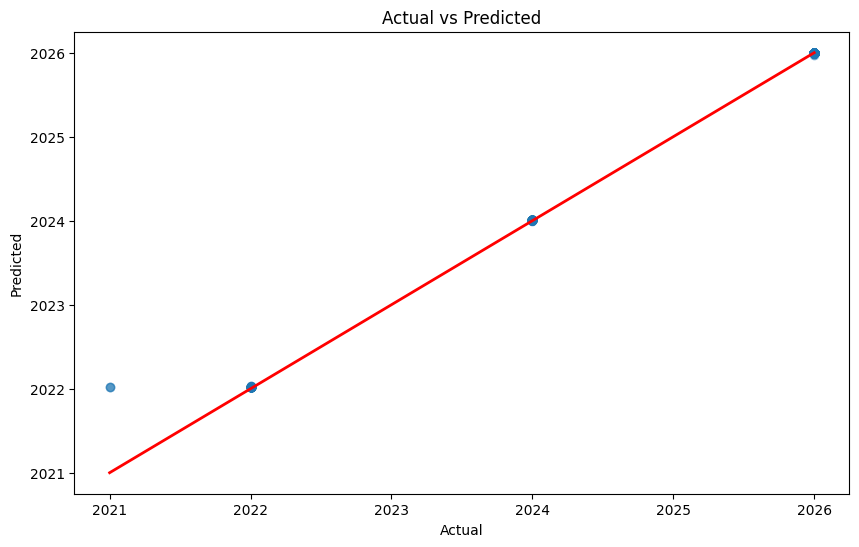

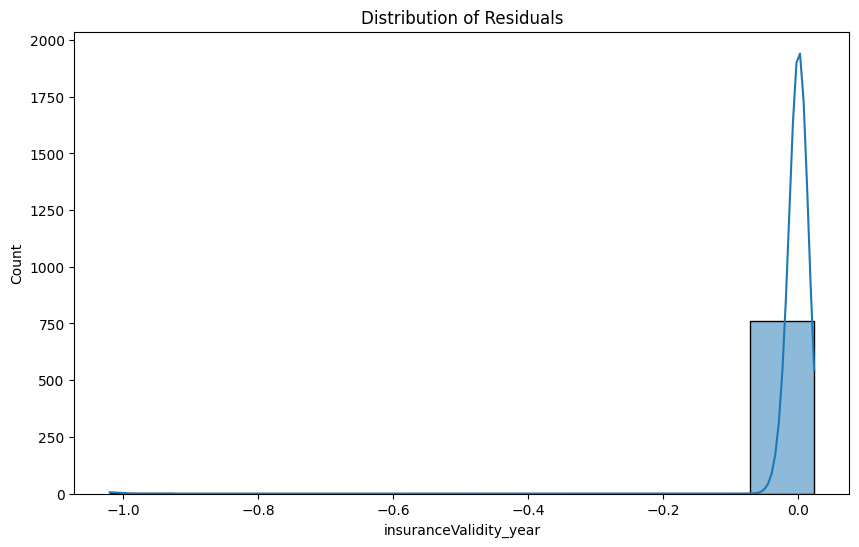

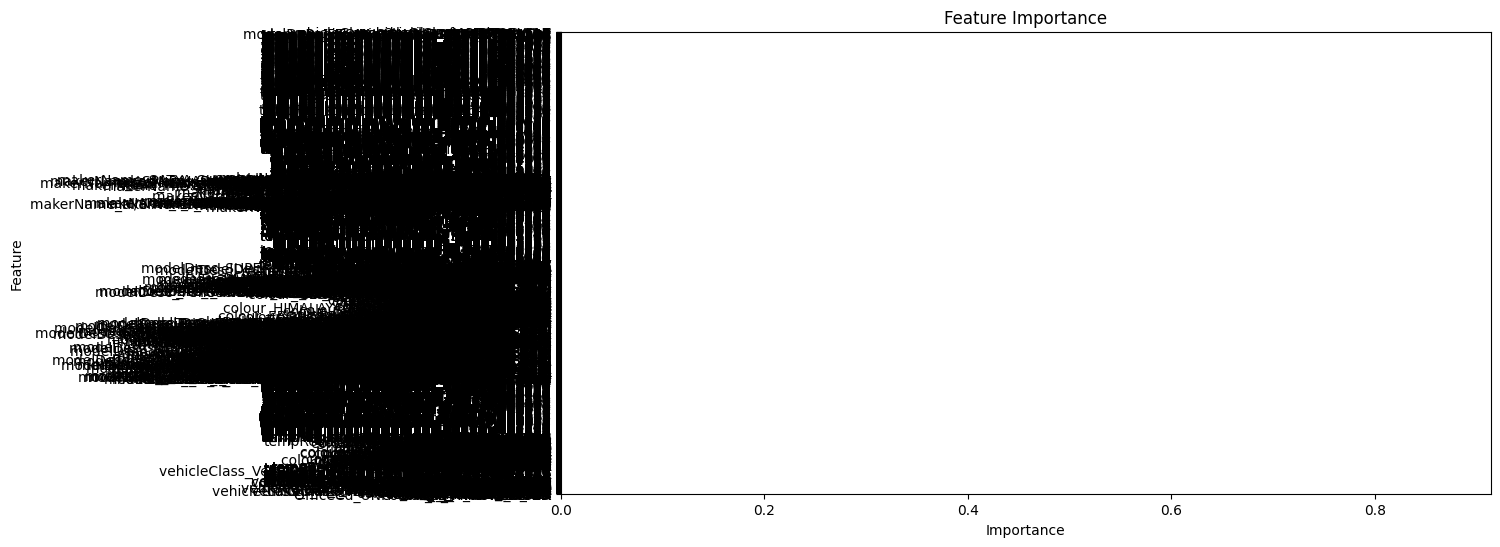

In [16]:


# Split the data into features and target
X = data.drop(columns=['insuranceValidity_year', 'insuranceValidity_month', 'insuranceValidity_day'])
y = data['insuranceValidity_year']  # Assuming we are predicting the year of insurance validity

# Encode categorical variables if any
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)

# Predicting with the XGBoost model
y_pred = xgb_model.predict(X_test)

# Evaluation
print('XGBoost Regression:')
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R²:', r2_score(y_test, y_pred))

# Hyperparameter Tuning with a smaller grid for efficiency
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

grid_search = GridSearchCV(estimator=XGBRegressor(objective='reg:squarederror', random_state=42),
                           param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Best model
best_xgb_model = grid_search.best_estimator_

# Predicting with the best XGBoost model
y_pred_best = best_xgb_model.predict(X_test)

# Evaluation
print('Best XGBoost Regression:')
print('MAE:', mean_absolute_error(y_test, y_pred_best))
print('MSE:', mean_squared_error(y_test, y_pred_best))
print('R²:', r2_score(y_test, y_pred_best))

# Visualization
# Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# Residuals plot
residuals = y_test - y_pred_best
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.show()

# Feature importance
importances = best_xgb_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

In [22]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regression': SVR(),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror'),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MAE': mae, 'MSE': mse, 'R2': r2}

    print(f"{name}:")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"R2 Score: {r2}\n")

# Convert results to a DataFrame for easier comparison
results_df = pd.DataFrame(results).T

# Identify the best model based on R2 Score
best_model_name = results_df['R2'].idxmax()
best_model = models[best_model_name]

# Print the best model
print(f"Best Model: {best_model_name}\n")
print(results_df)

# Predict with the best model
y_pred_best = best_model.predict(X_test)


Linear Regression:
Mean Absolute Error: 5.465594059943606
Mean Squared Error: 131.2430823732949
R2 Score: -102.40711942032175

Ridge:
Mean Absolute Error: 0.12974045394802122
Mean Squared Error: 0.10154515715935923
R2 Score: 0.9199920330805198

Lasso:
Mean Absolute Error: 0.7105969143927426
Mean Squared Error: 1.1213907649631825
R2 Score: 0.11645027949306186

Decision Tree:
Mean Absolute Error: 0.003926701570680628
Mean Squared Error: 0.003926701570680628
R2 Score: 0.9969061310439783

Random Forest:
Mean Absolute Error: 0.0029973821989525344
Mean Squared Error: 0.0026462041884816236
R2 Score: 0.997915041710537

Gradient Boosting:
Mean Absolute Error: 0.0035222118495949794
Mean Squared Error: 0.0027906919840461346
R2 Score: 0.997801199011474

Support Vector Regression:
Mean Absolute Error: 0.4737007874034196
Mean Squared Error: 0.7663610710741194
R2 Score: 0.39618005488286046

XGBoost:
Mean Absolute Error: 0.002740031137516361
Mean Squared Error: 0.0026184551573860708
R2 Score: 0.997936

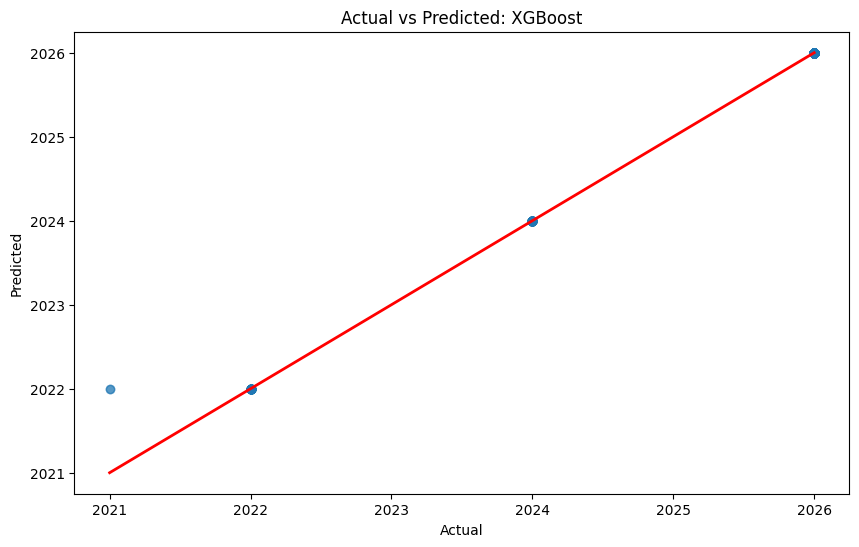

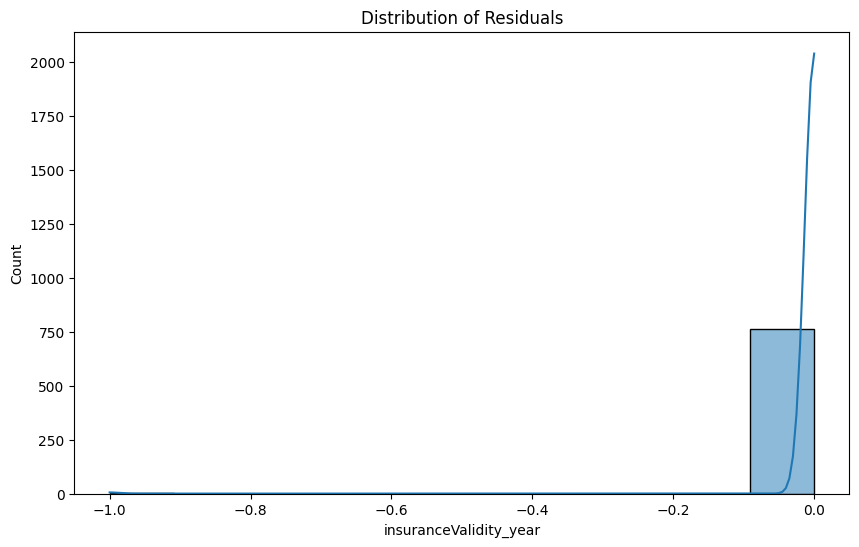

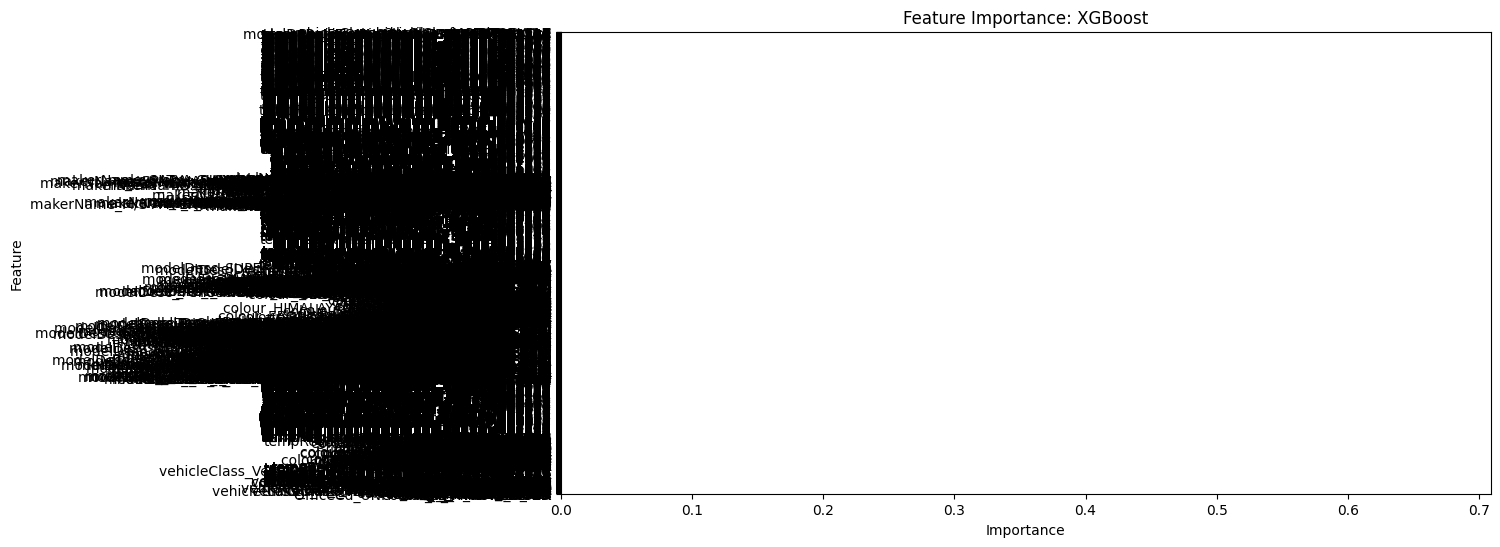

In [23]:
# Visualization
# Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs Predicted: {best_model_name}')
plt.show()

# Residuals plot
residuals = y_test - y_pred_best
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.show()

# Feature importance for tree-based models and XGBoost
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    features = X.columns
    importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title(f'Feature Importance: {best_model_name}')
    plt.show()


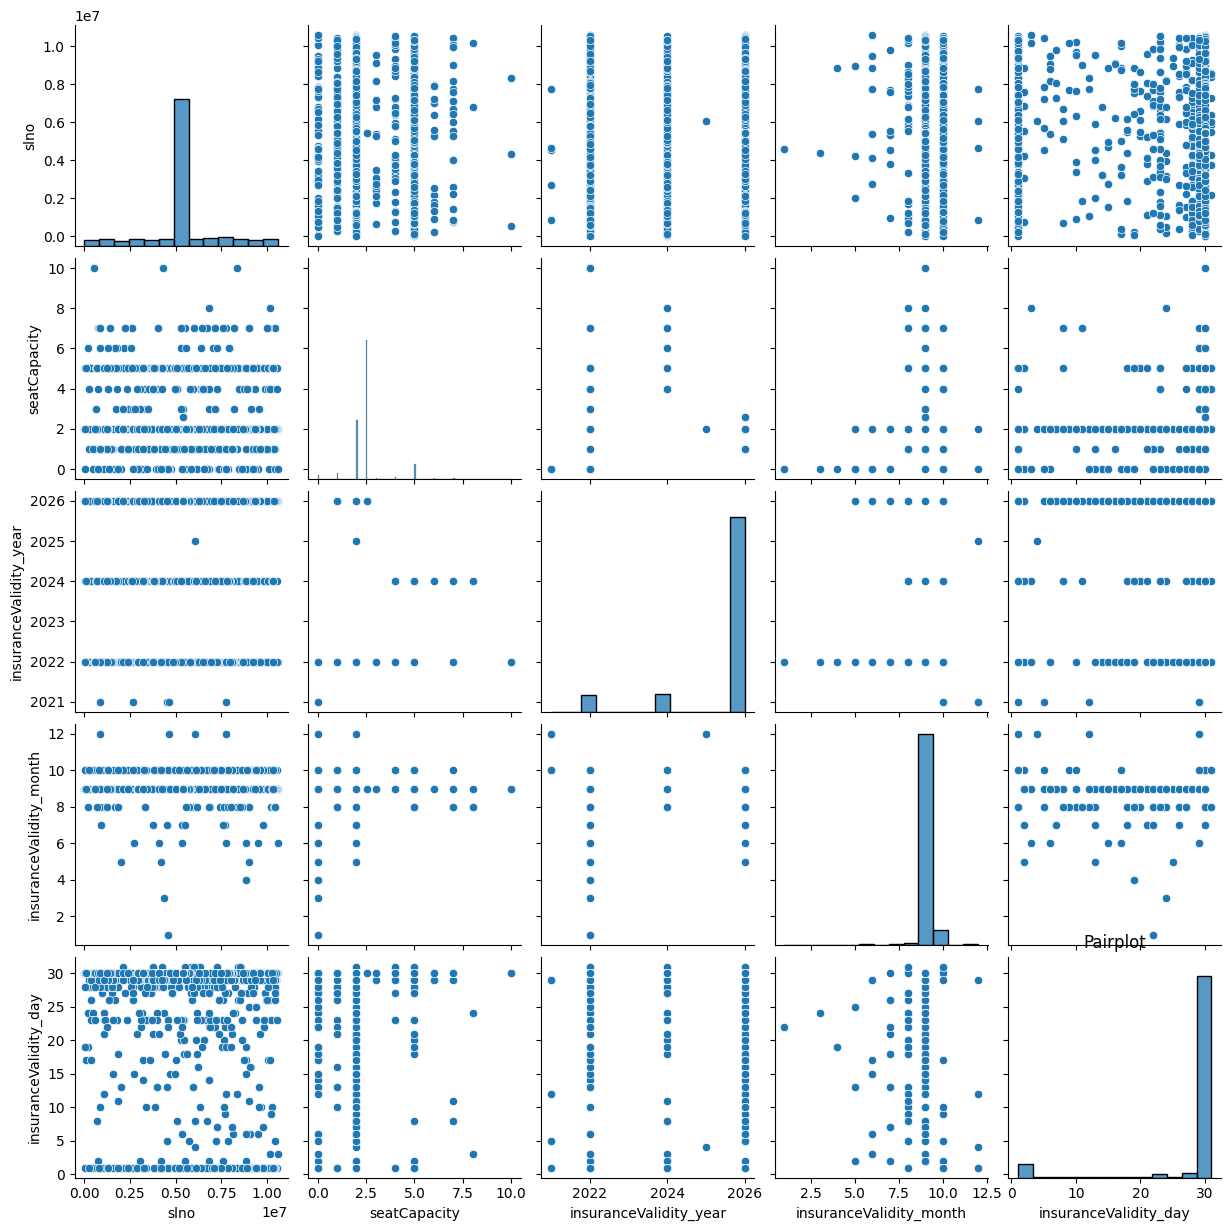

In [27]:
#Pairplot
sns.pairplot(data)
plt.title('Pairplot')
plt.show()


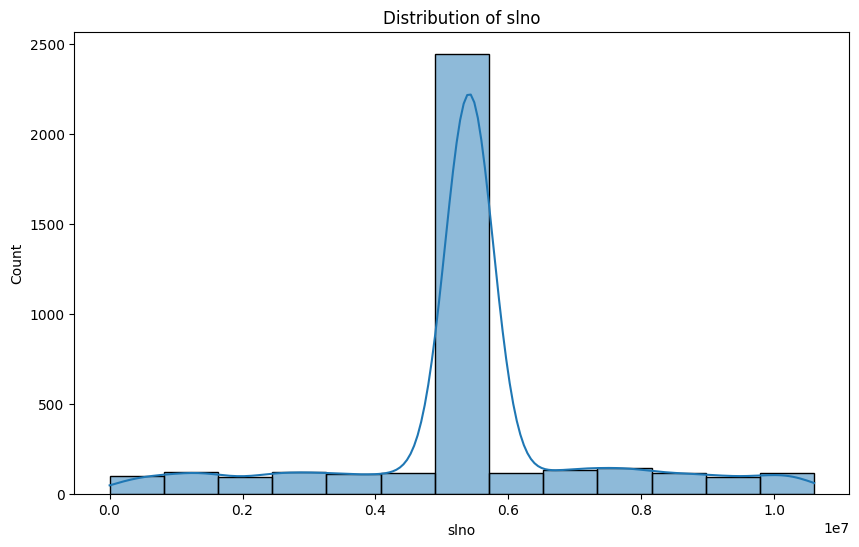

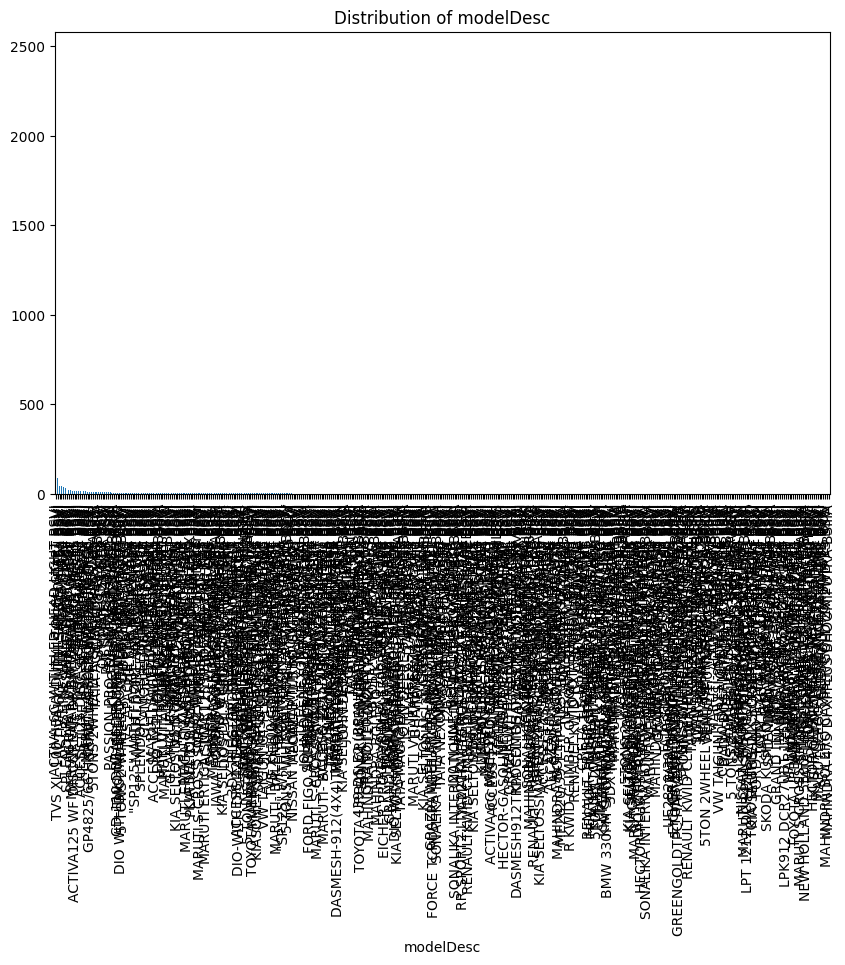

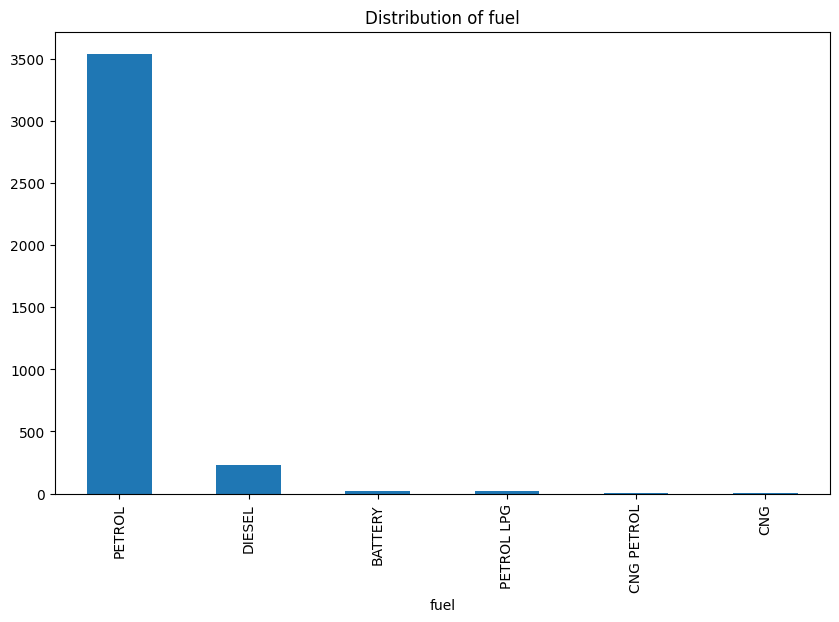

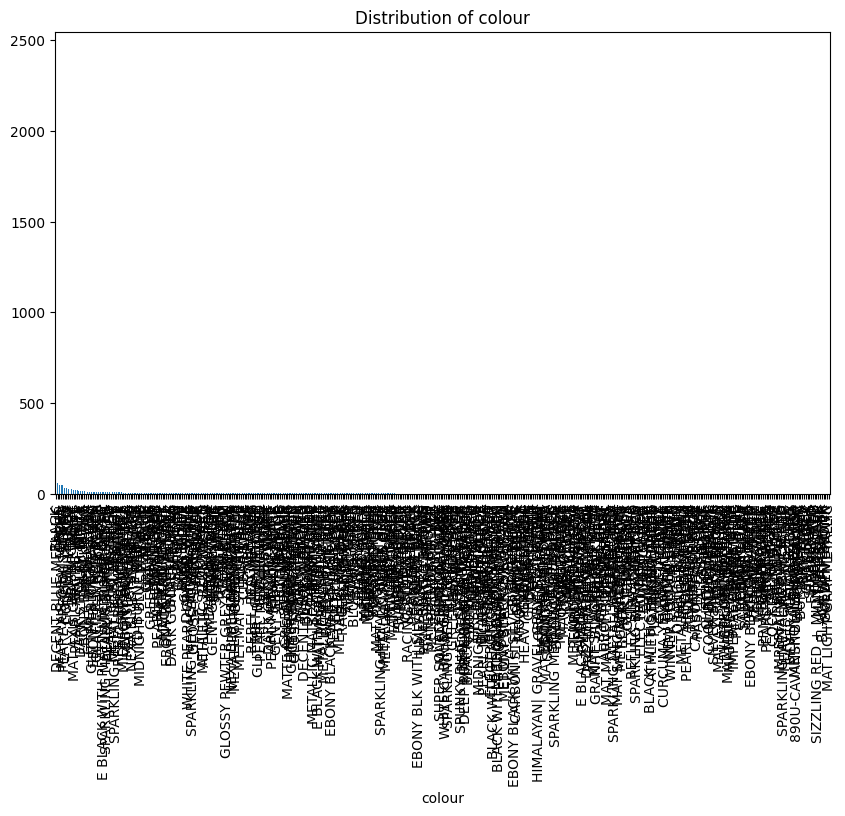

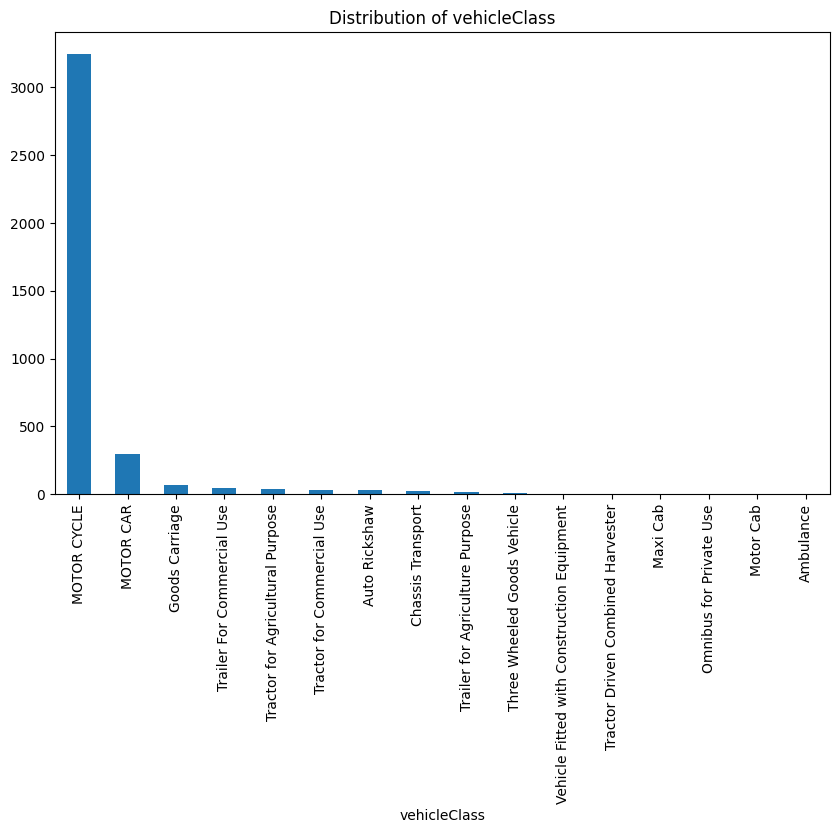

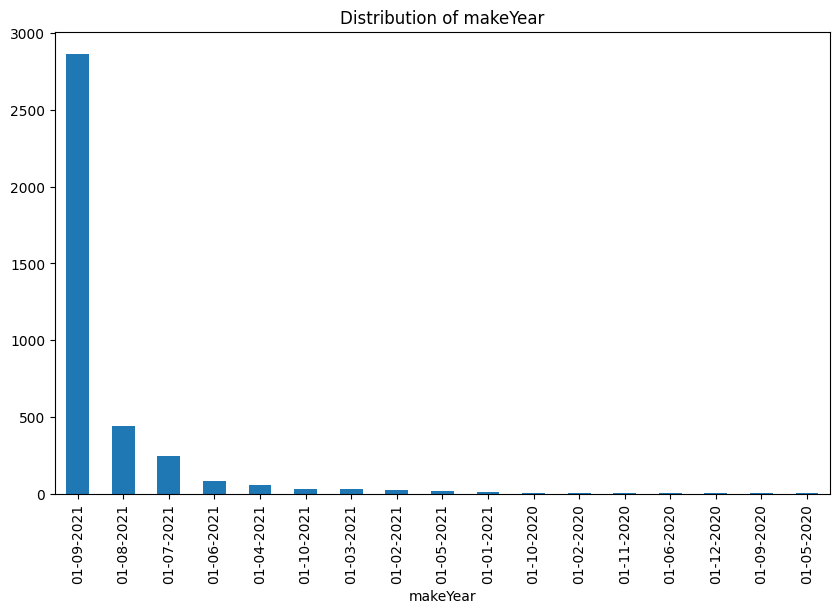

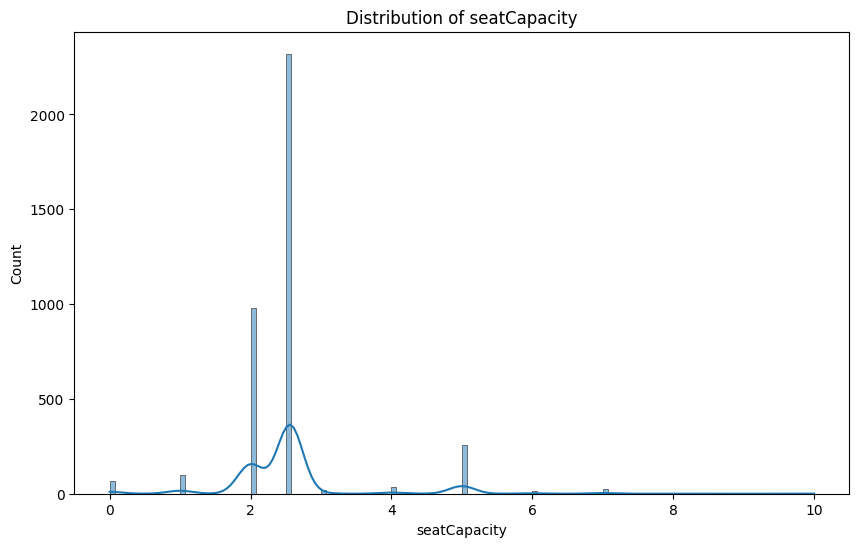

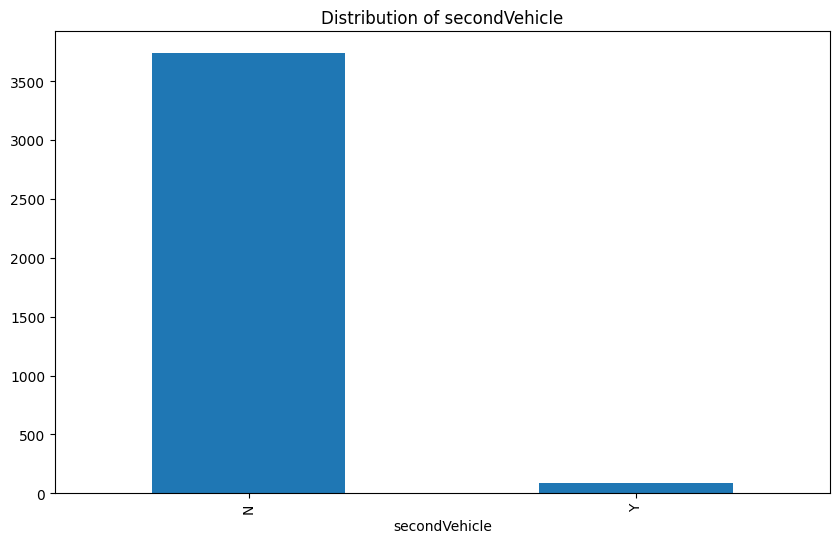

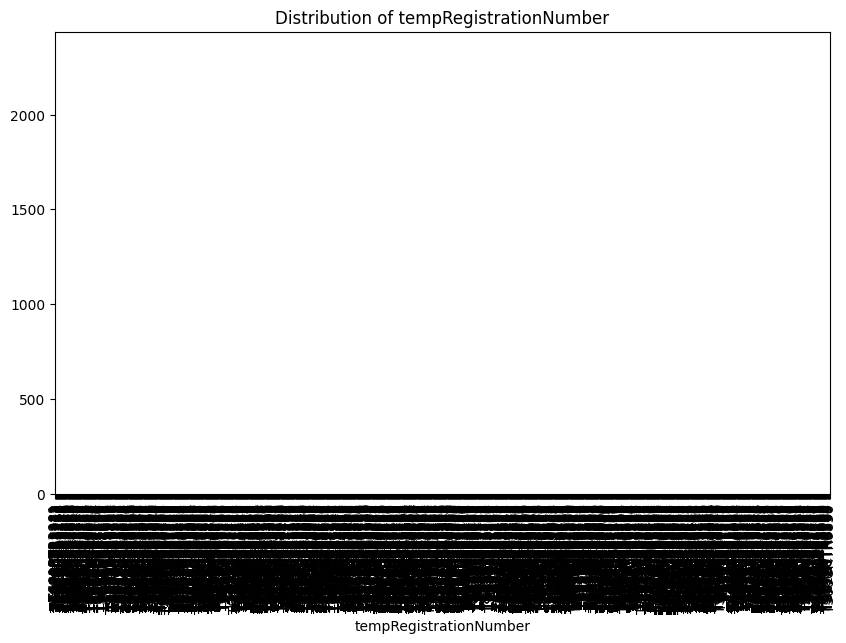

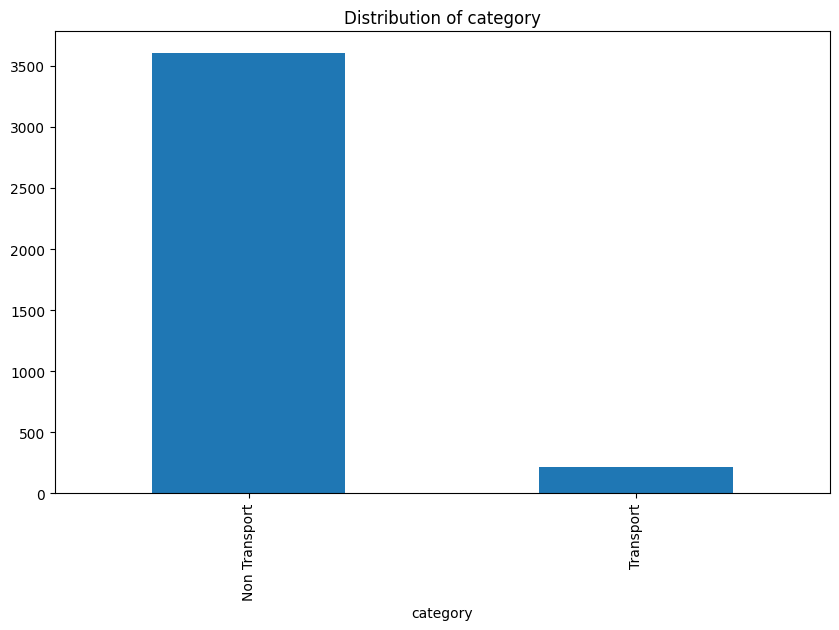

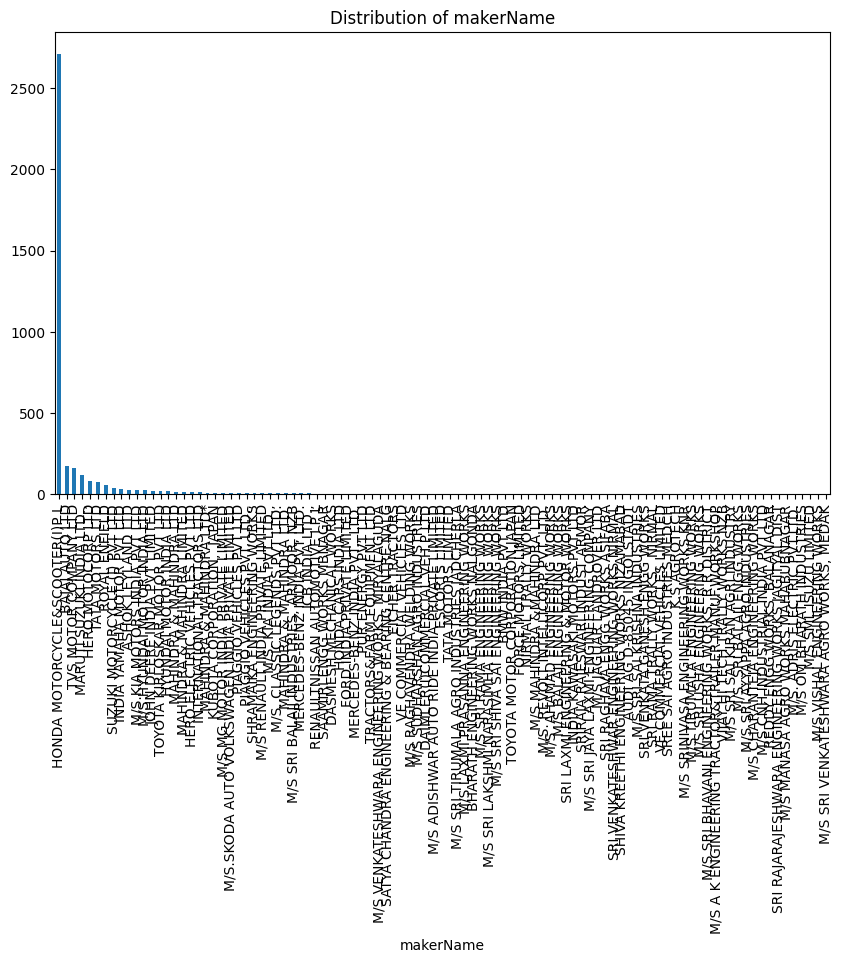

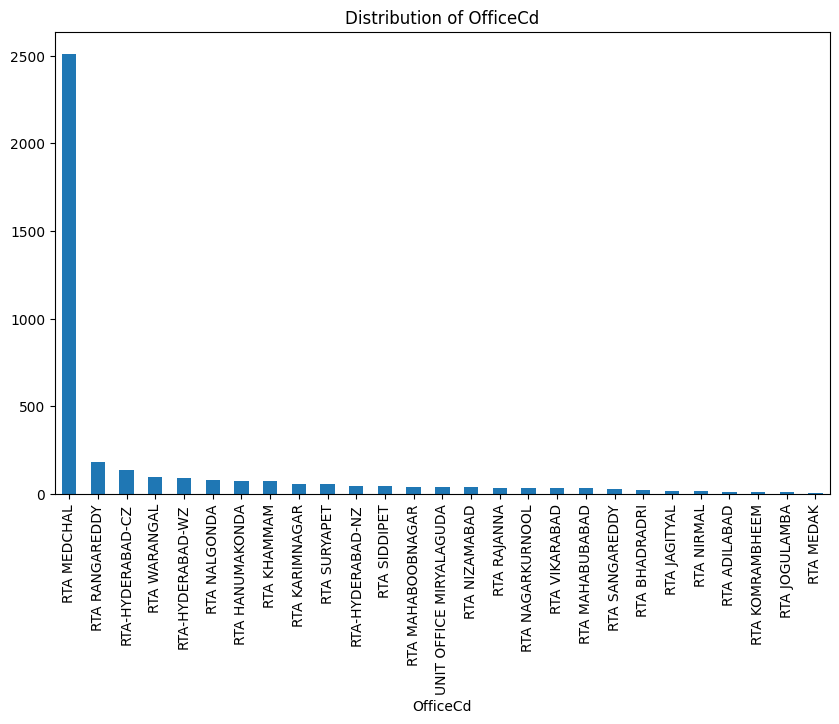

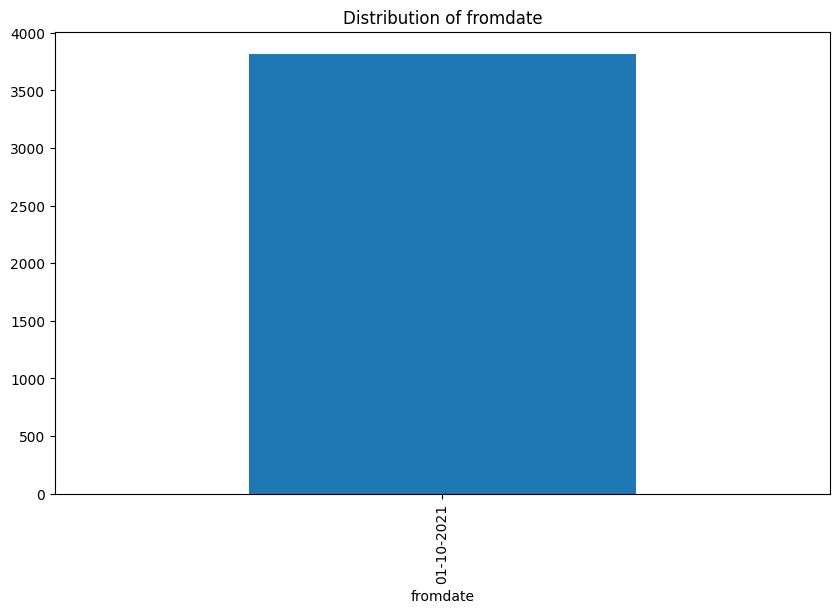

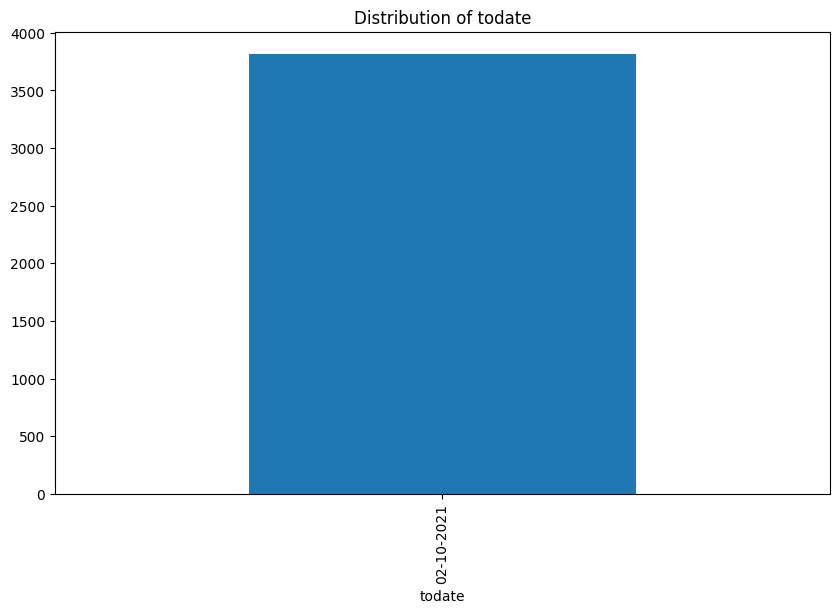

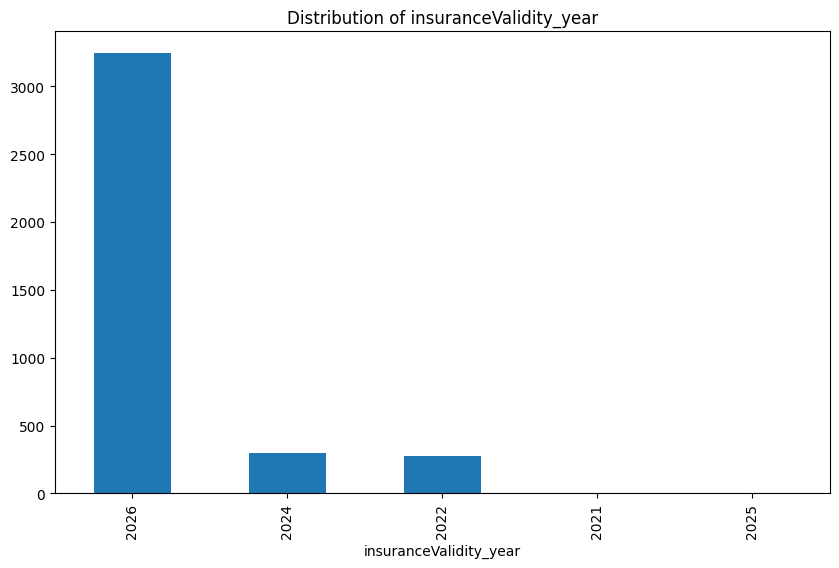

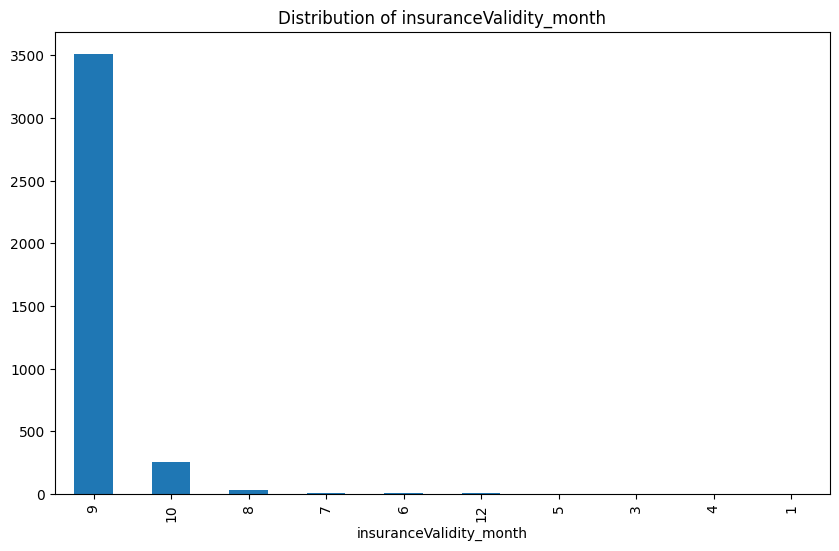

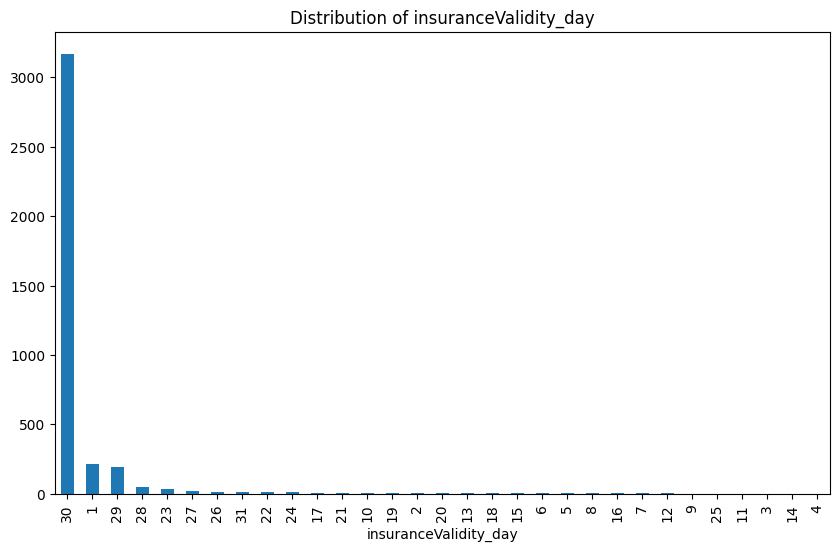

In [28]:
#Distribution Plot
for col in data.columns:
    plt.figure(figsize=(10, 6))
    if data[col].dtype in [np.float64, np.int64]:
        sns.histplot(data[col], kde=True)
    else:
        data[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.show()


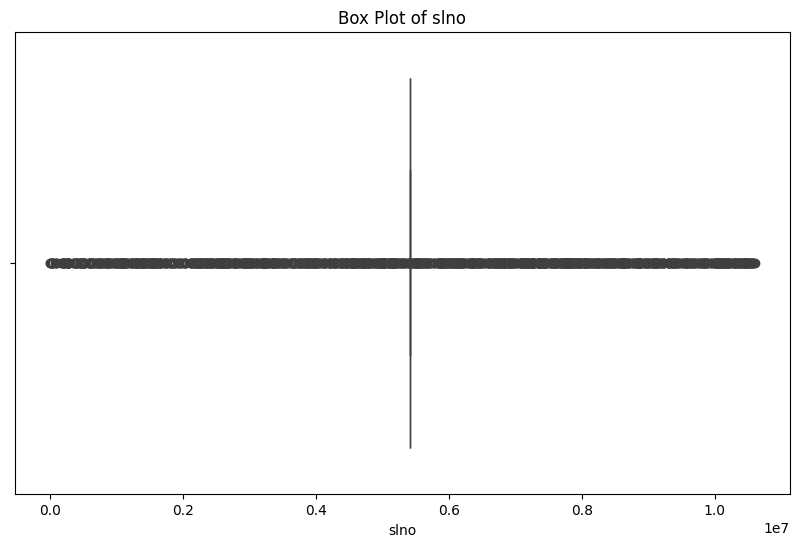

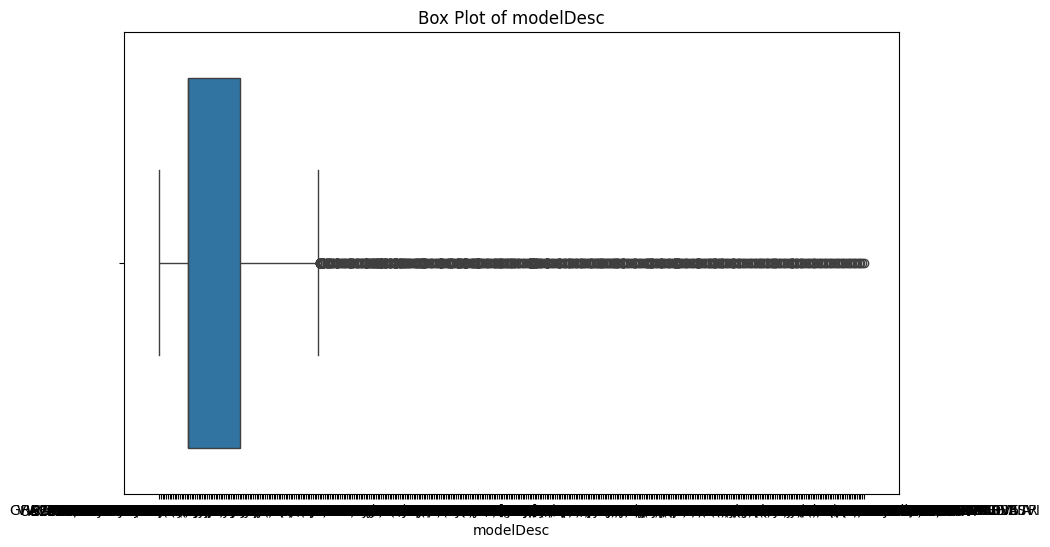

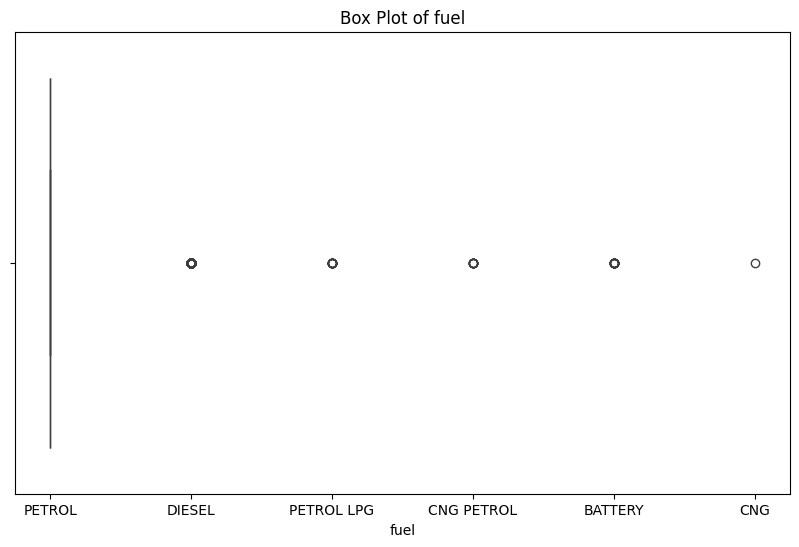

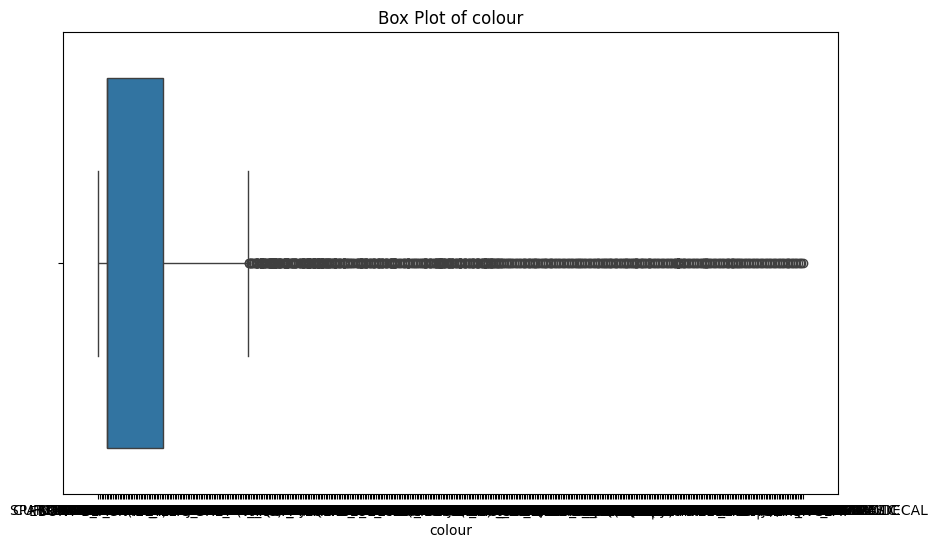

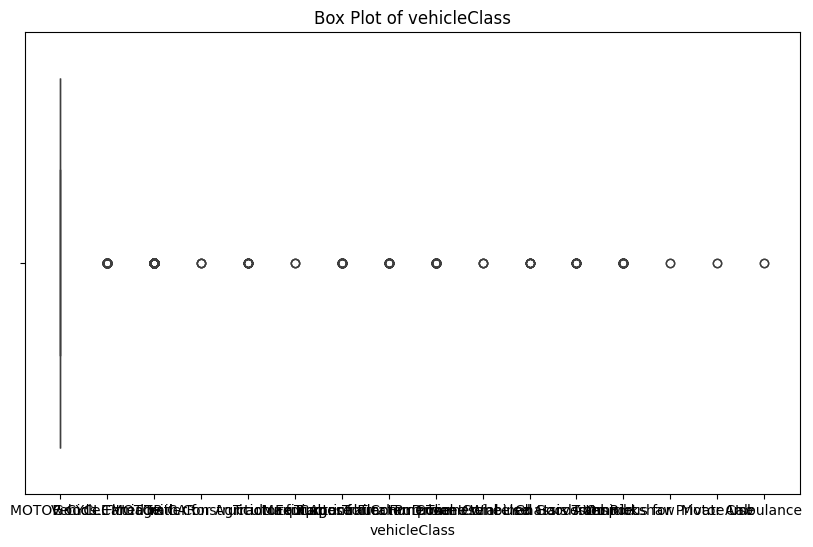

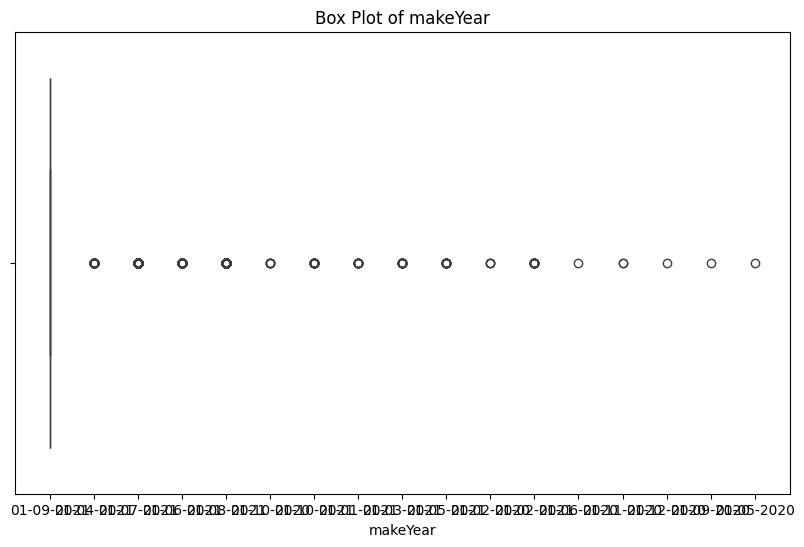

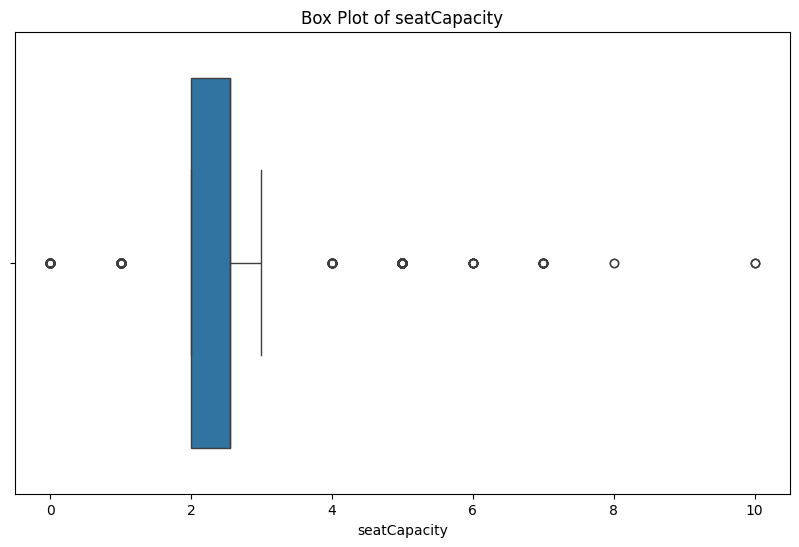

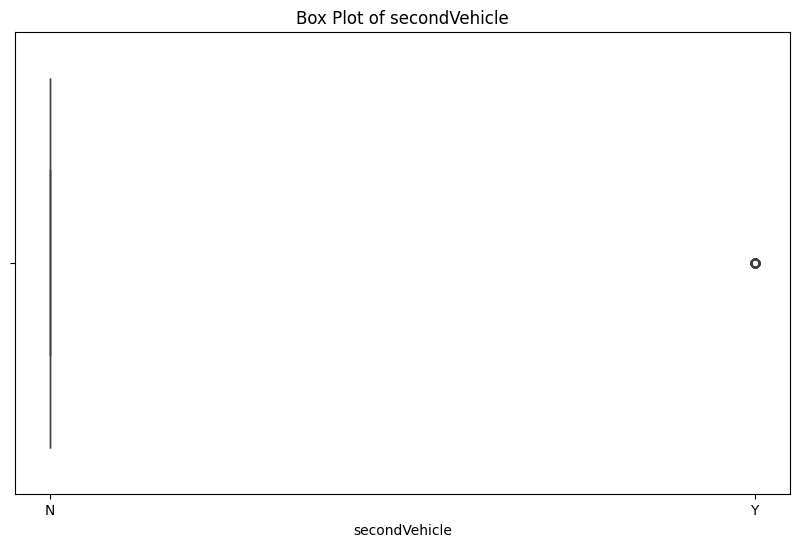

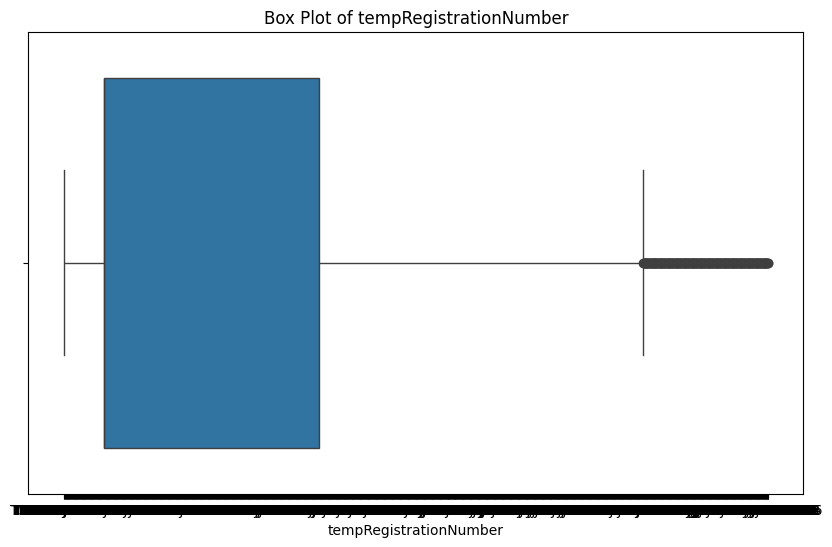

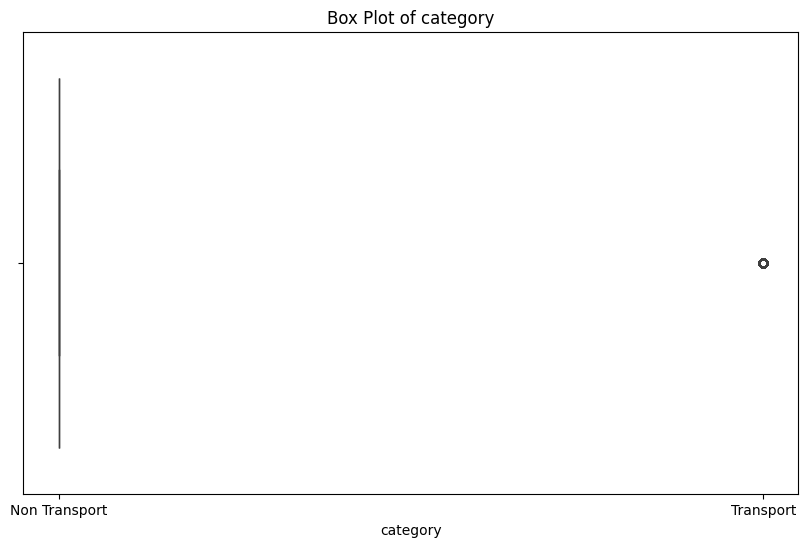

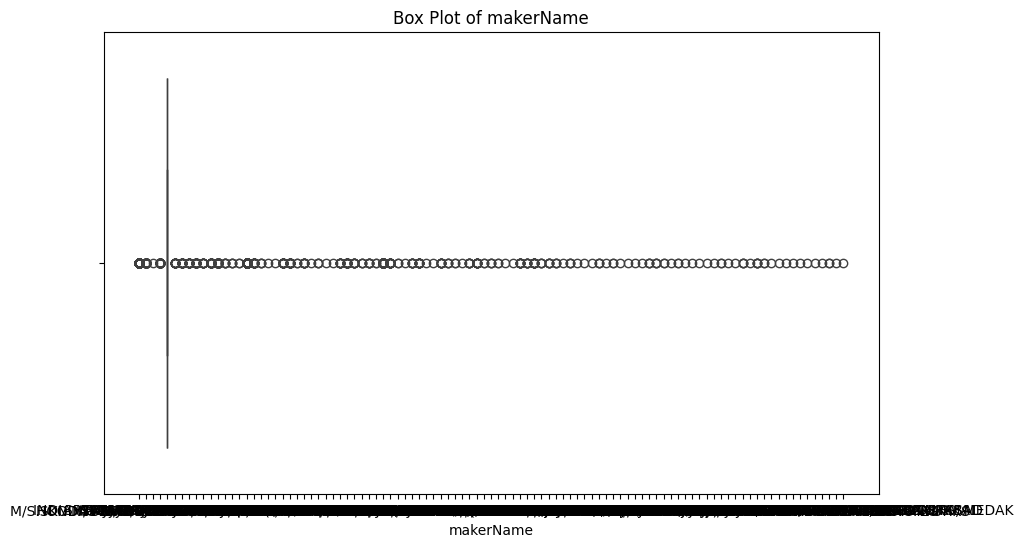

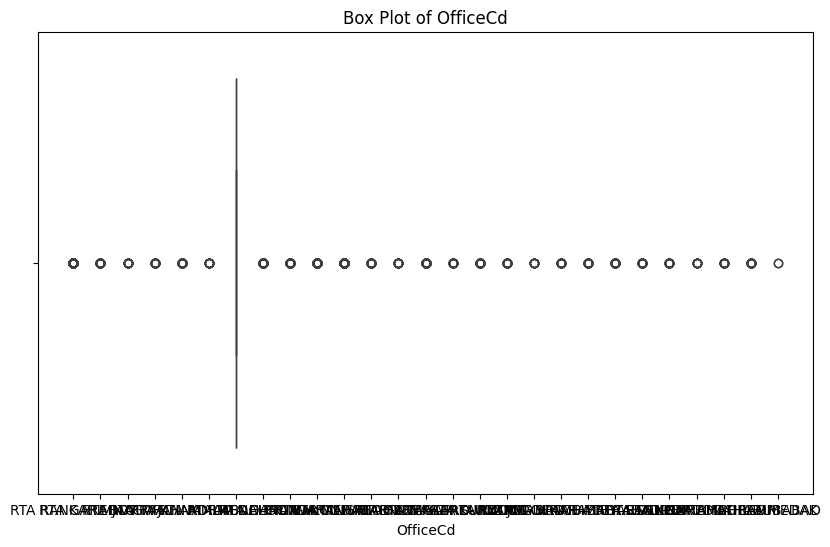

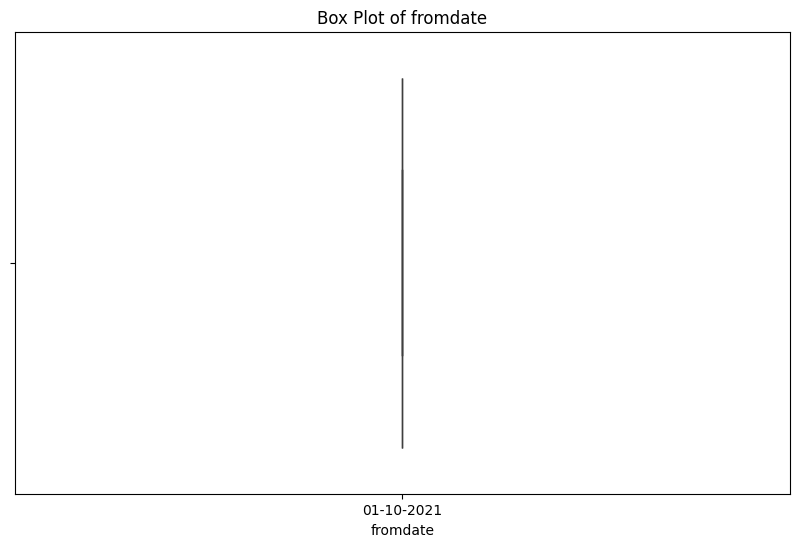

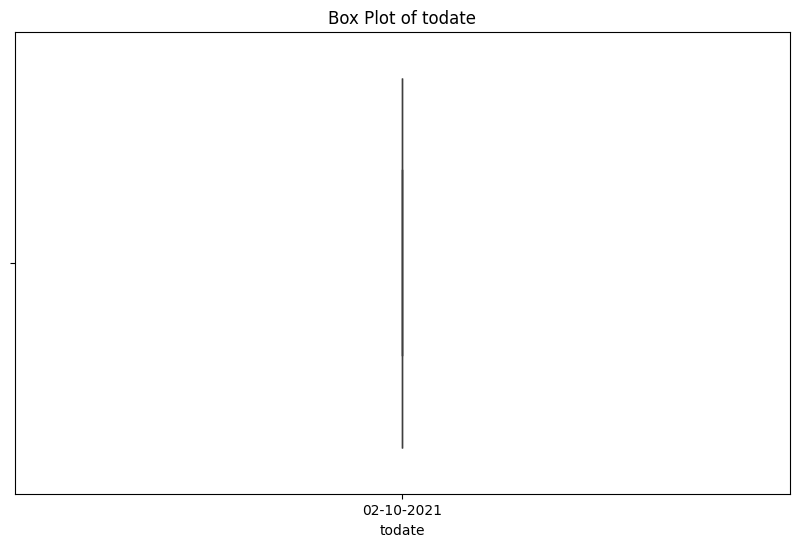

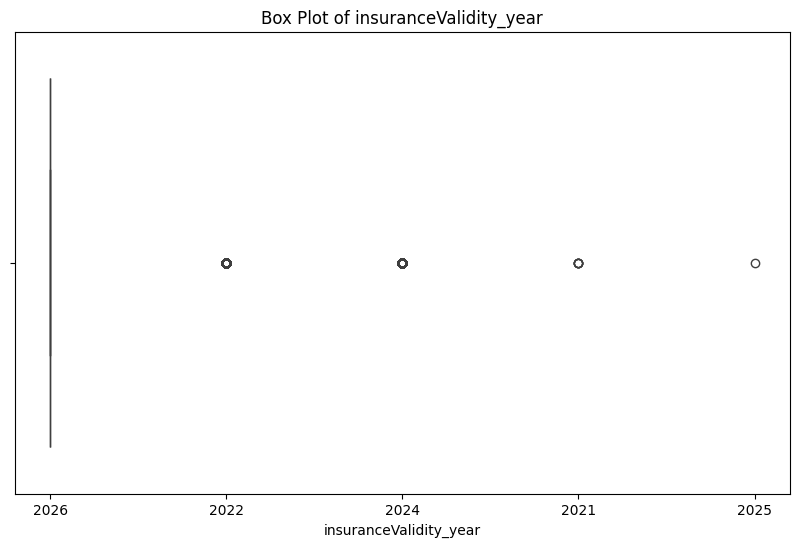

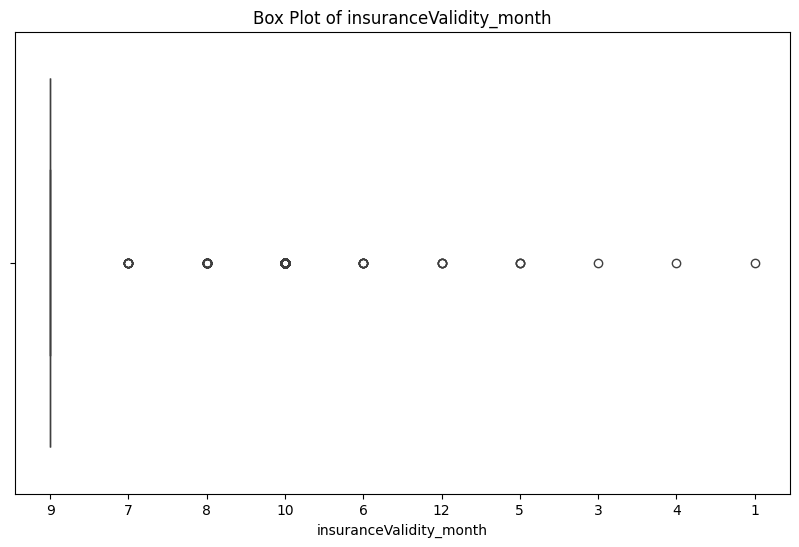

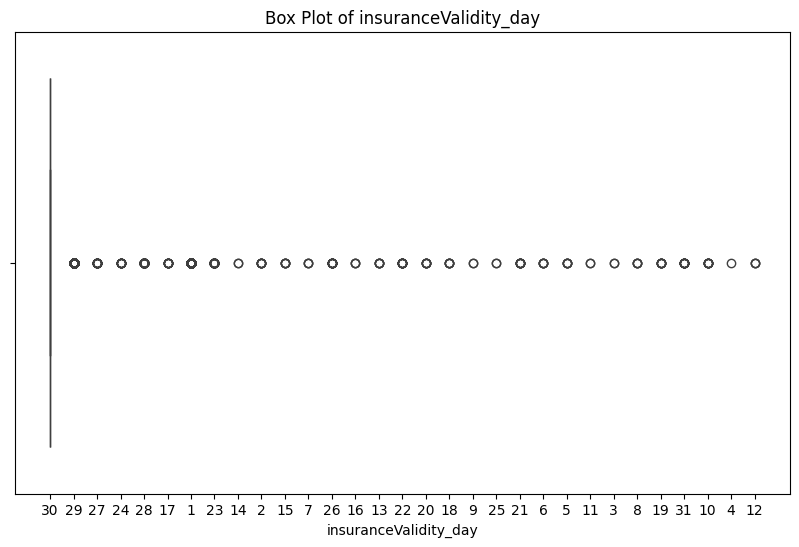

In [29]:
#Box Plot

for col in data.columns:
    plt.figure(figsize=(10, 6))
    if data[col].dtype in [np.float64, np.int64]:
        sns.boxplot(x=data[col])
    else:
        sns.boxplot(x=data[col].astype(str))
    plt.title(f'Box Plot of {col}')
    plt.show()


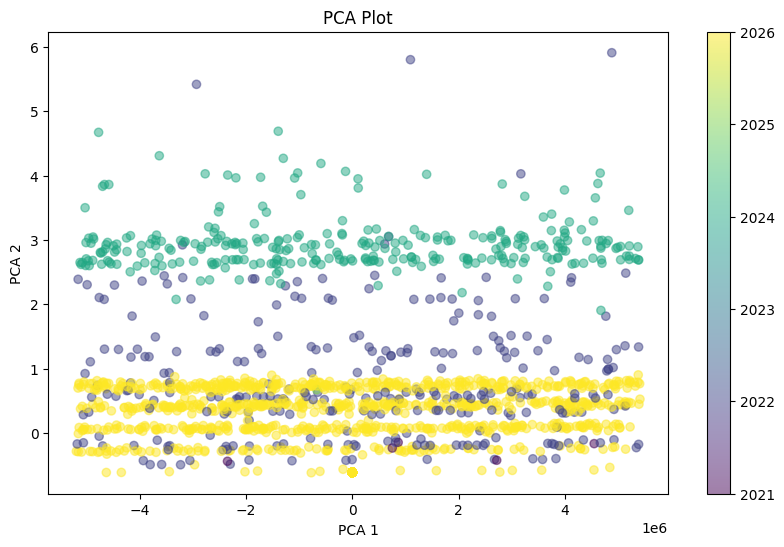

In [31]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA Plot')
plt.colorbar()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


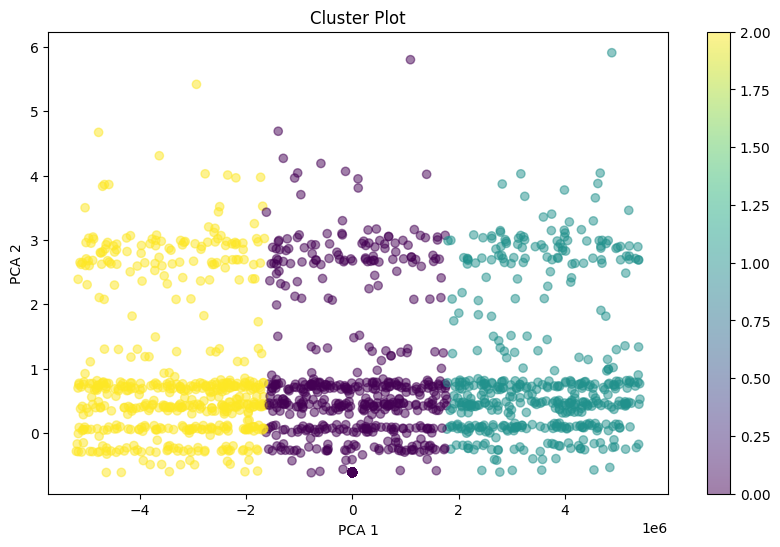

In [32]:
#Cluster Plot
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Cluster Plot')
plt.colorbar()
plt.show()


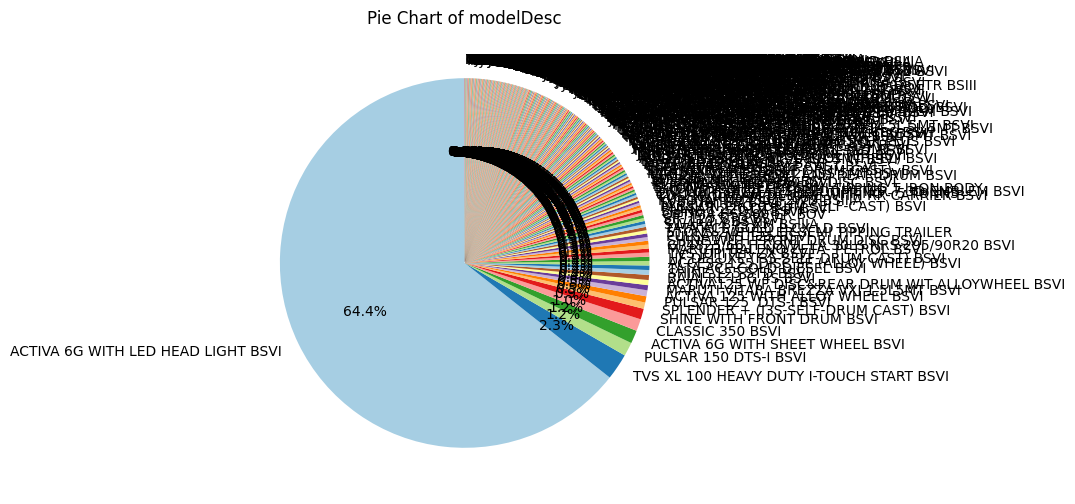

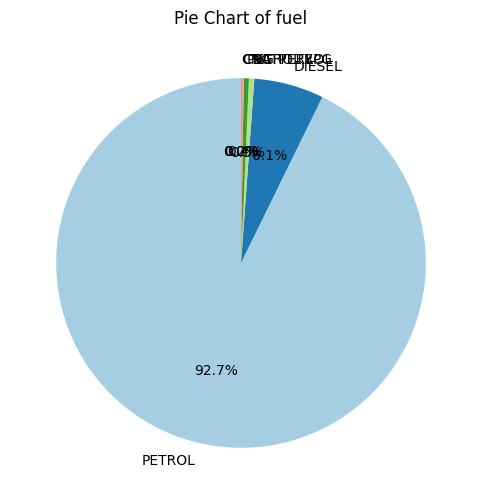

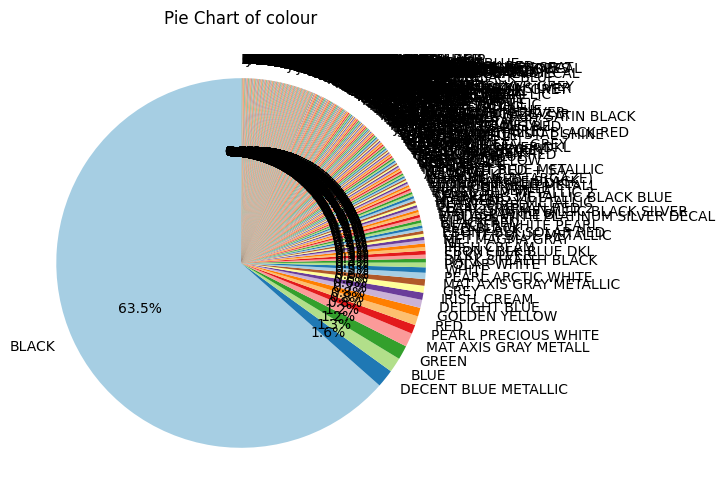

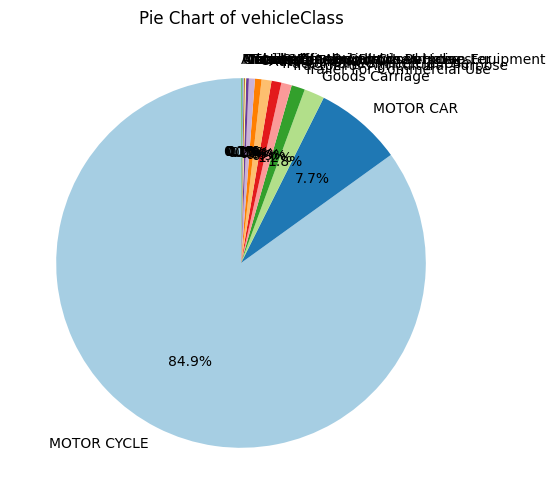

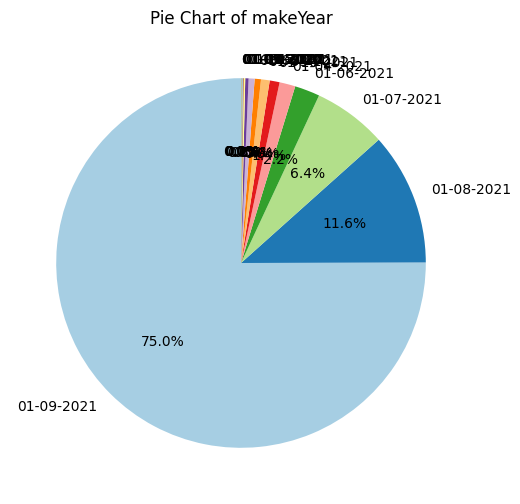

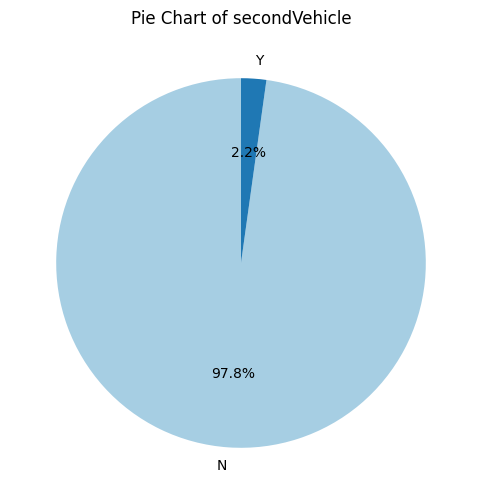

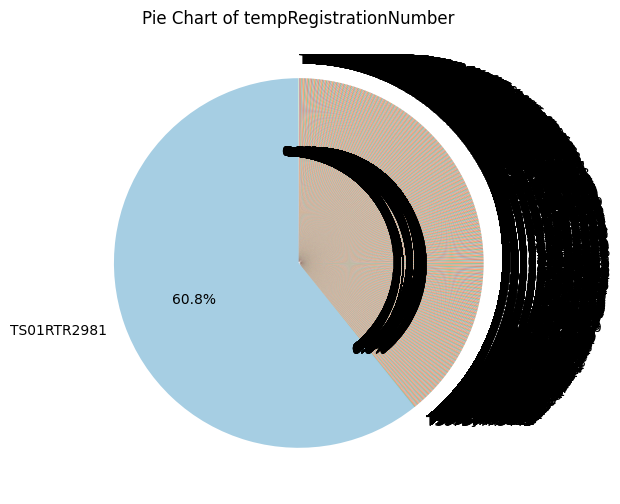

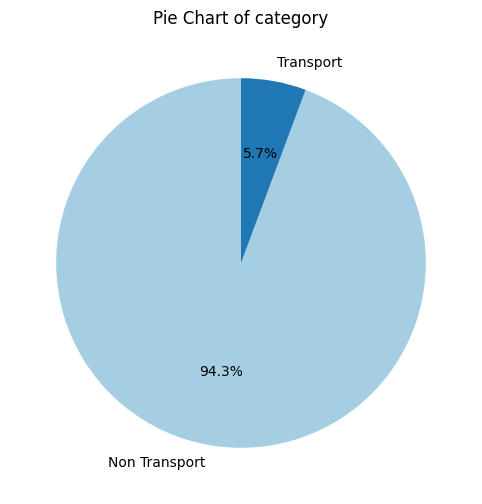

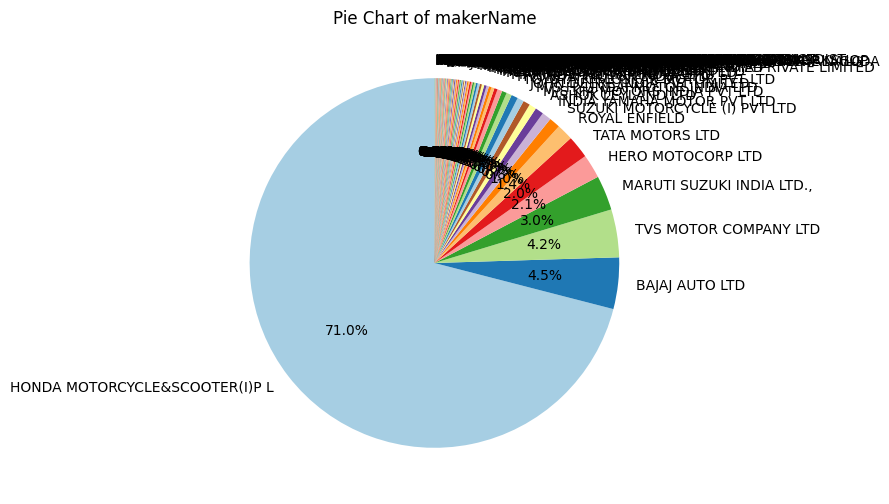

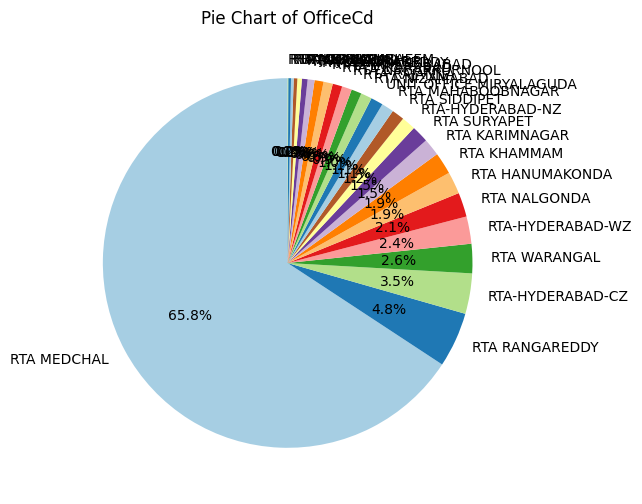

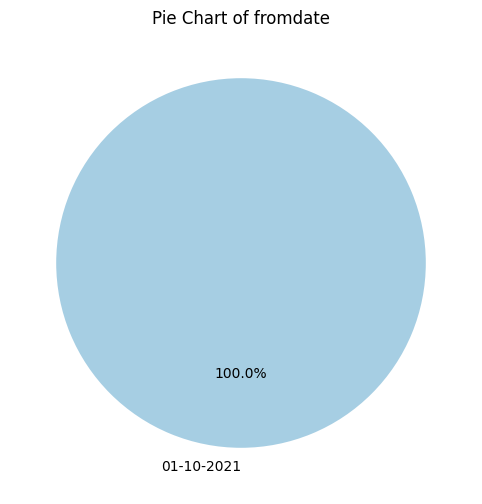

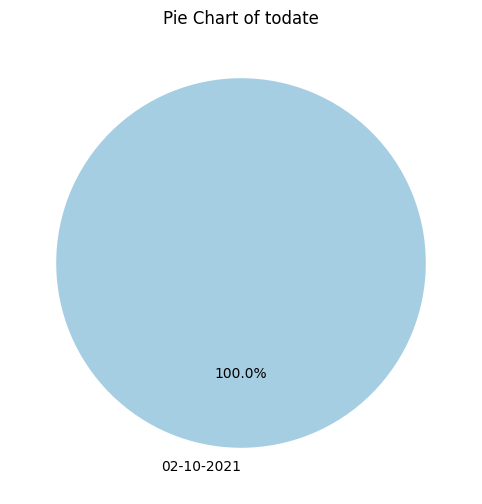

In [36]:
import matplotlib.pyplot as plt

# Pie Chart for categorical columns
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    data[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Paired", len(data[col].unique())))
    plt.title(f'Pie Chart of {col}')
    plt.ylabel('')  # Remove y-label
    plt.show()


<ipython-input-37-b83460f7caa3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette='viridis')


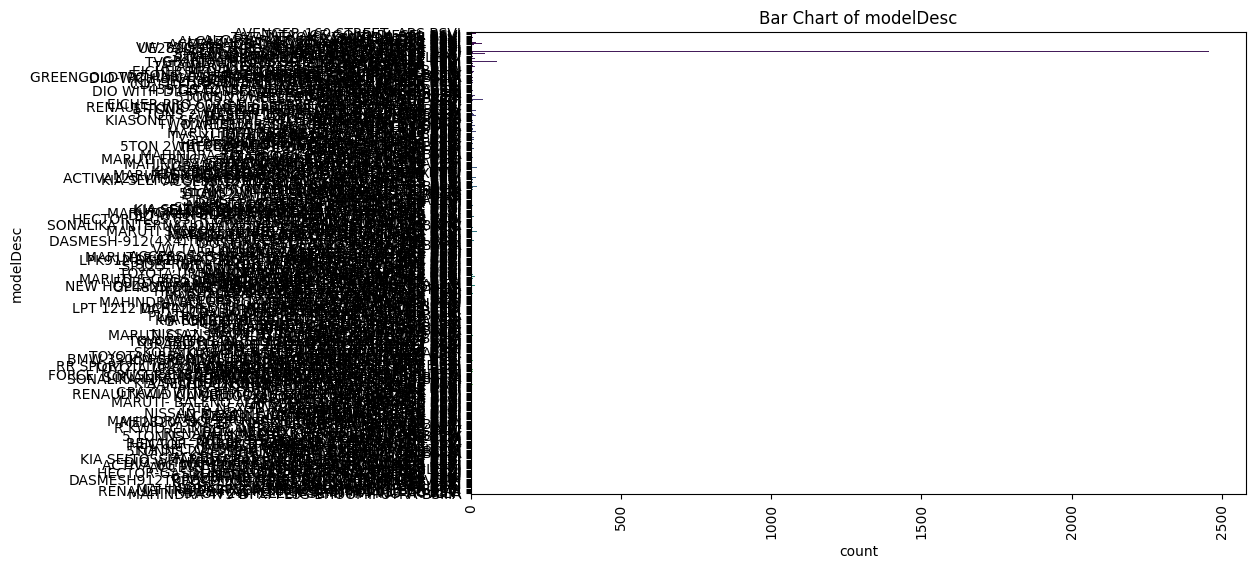

<ipython-input-37-b83460f7caa3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette='viridis')


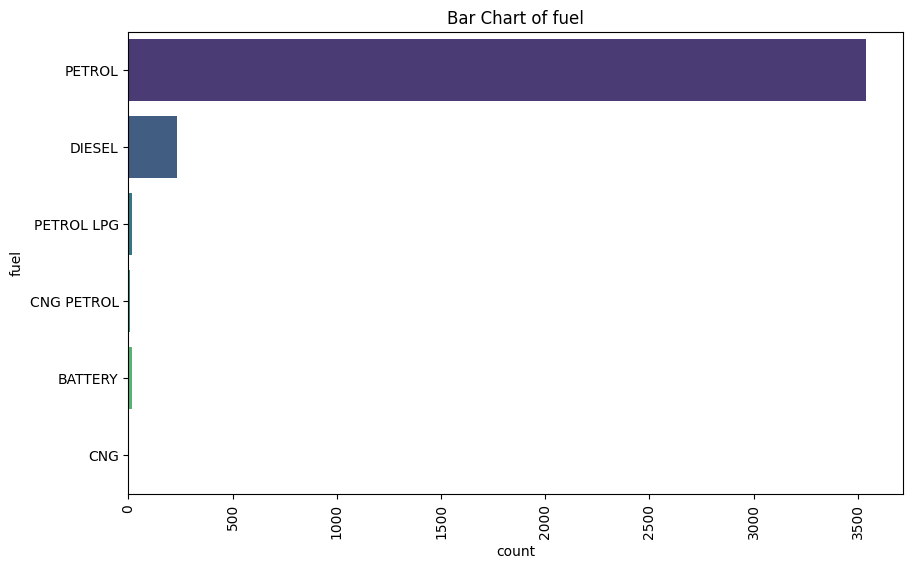

<ipython-input-37-b83460f7caa3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette='viridis')


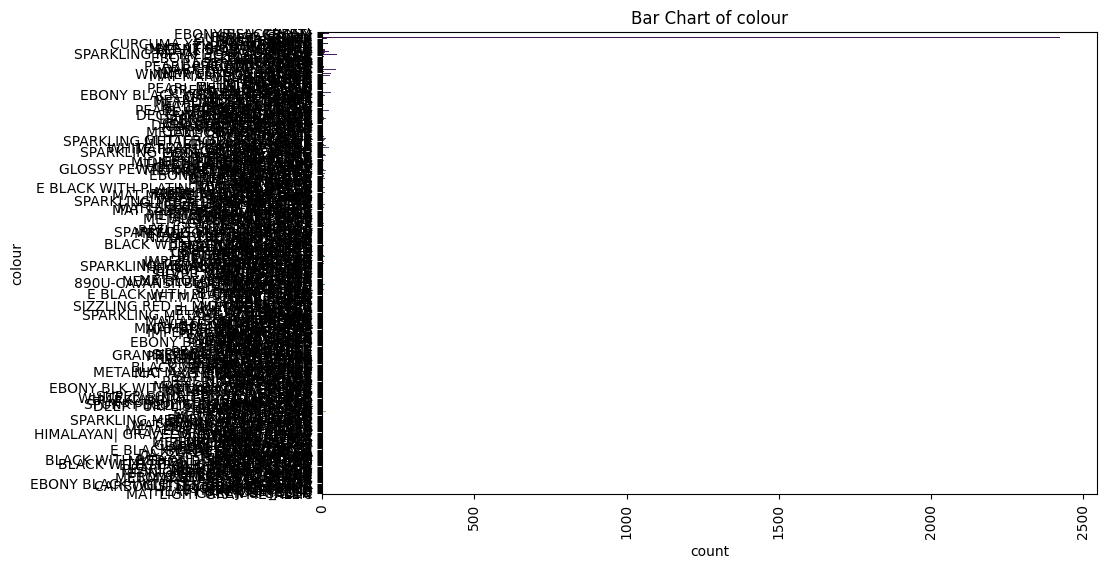

<ipython-input-37-b83460f7caa3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette='viridis')


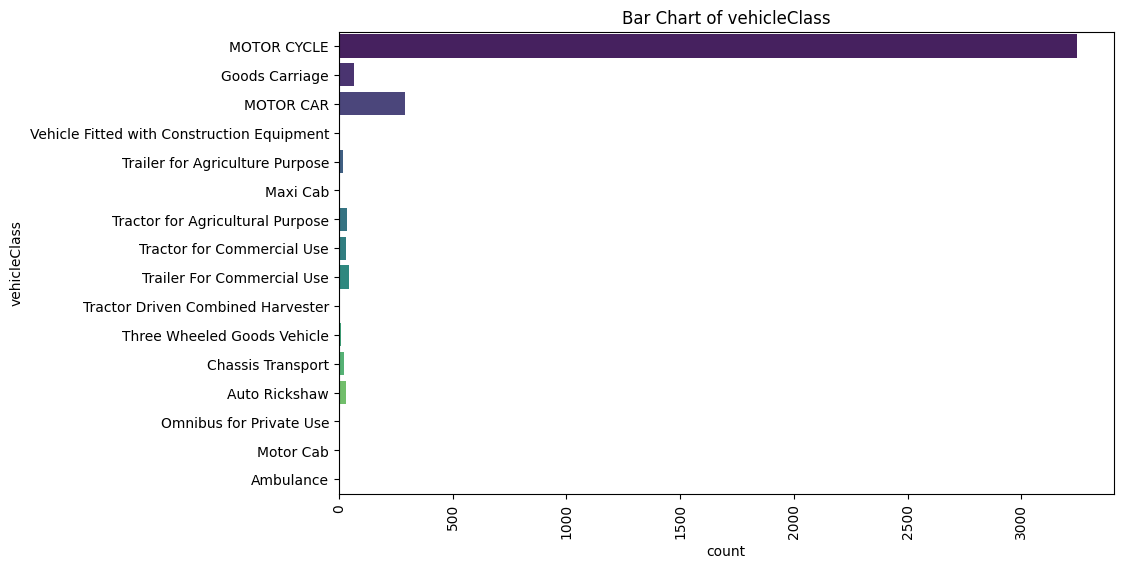

<ipython-input-37-b83460f7caa3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette='viridis')


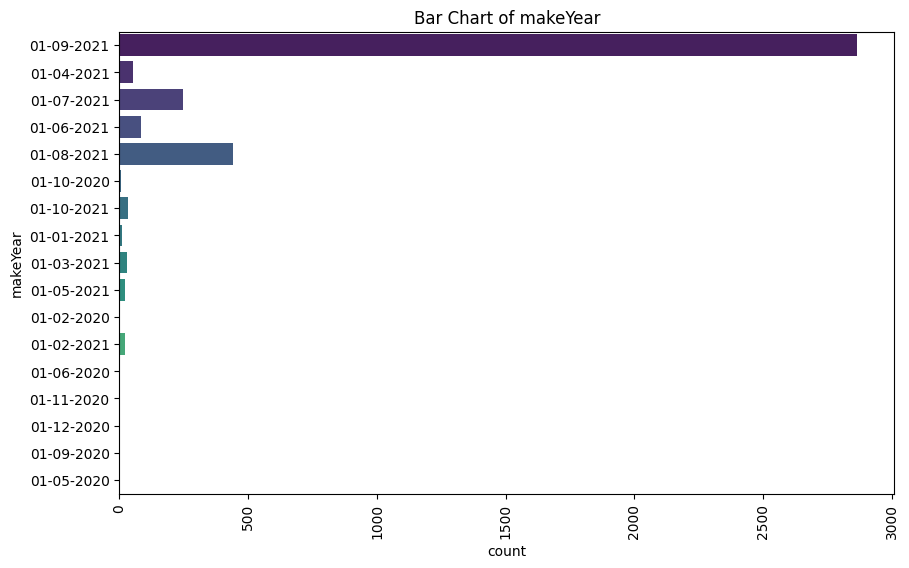

<ipython-input-37-b83460f7caa3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette='viridis')


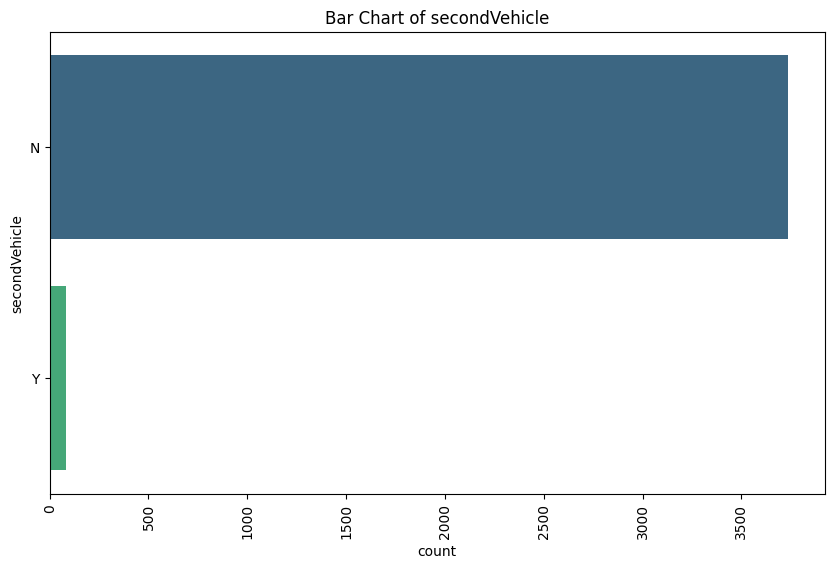

<ipython-input-37-b83460f7caa3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette='viridis')


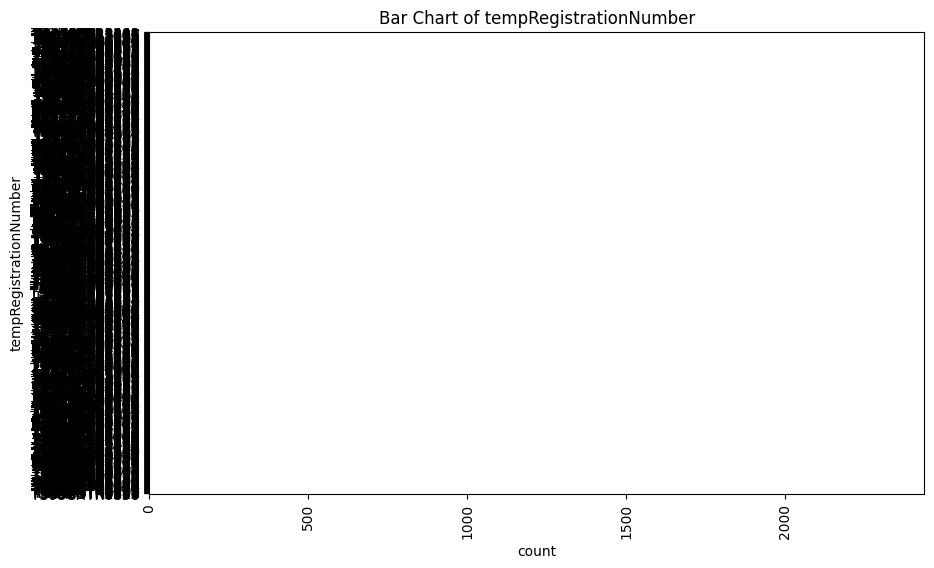

<ipython-input-37-b83460f7caa3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette='viridis')


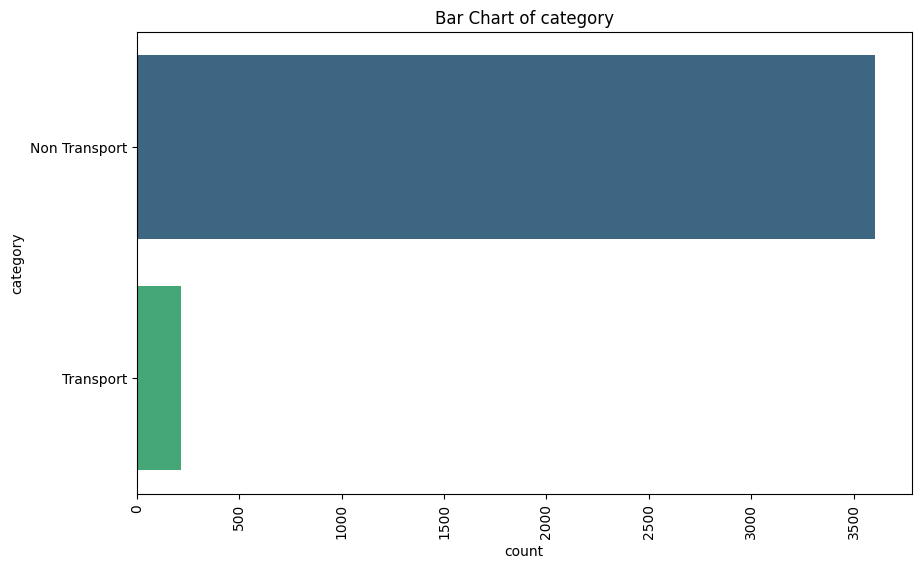

<ipython-input-37-b83460f7caa3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette='viridis')


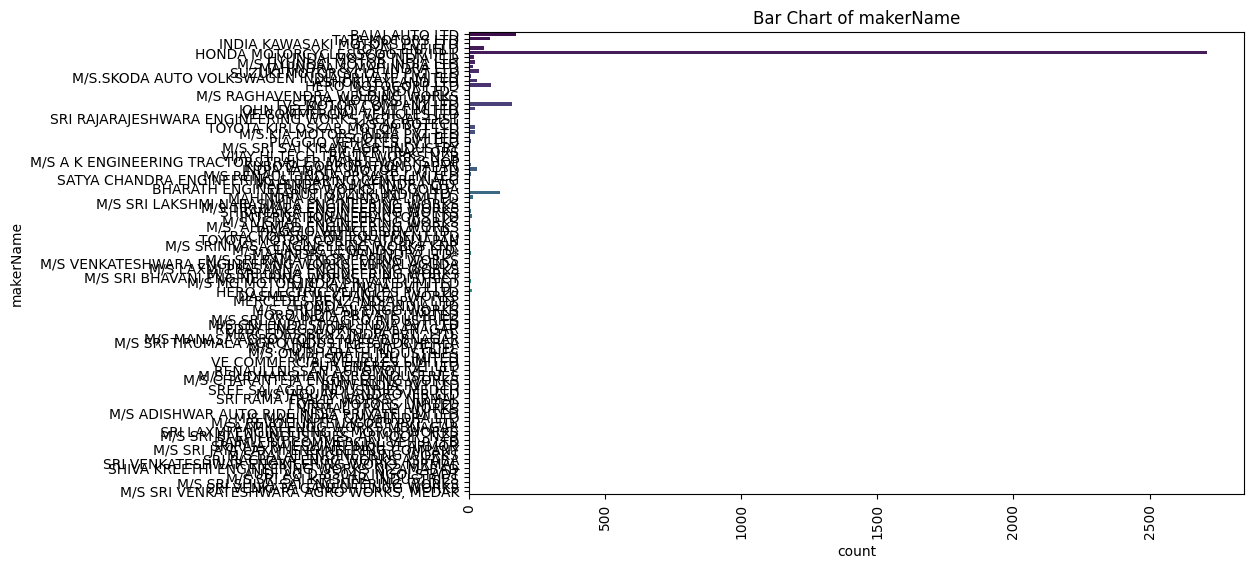

<ipython-input-37-b83460f7caa3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette='viridis')


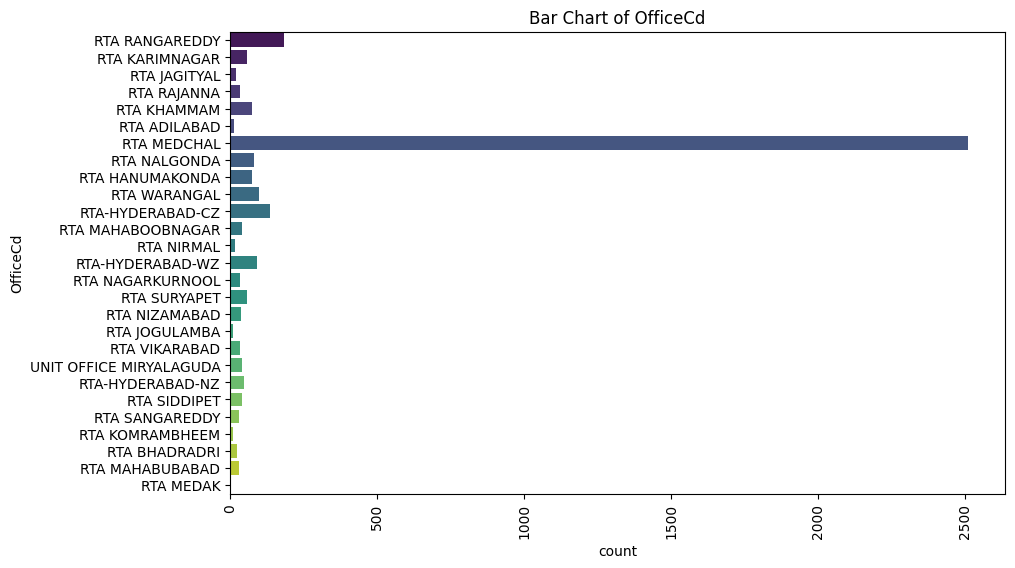

<ipython-input-37-b83460f7caa3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette='viridis')


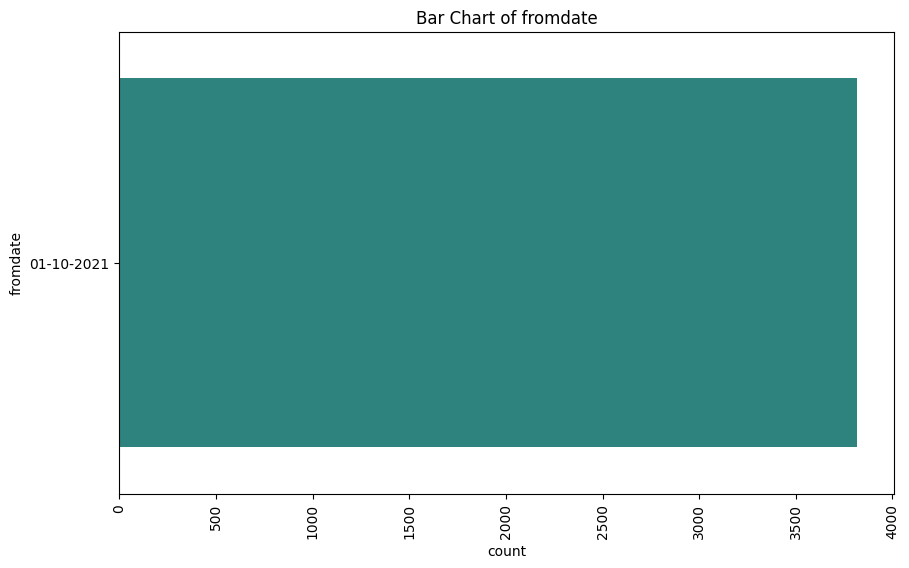

<ipython-input-37-b83460f7caa3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette='viridis')


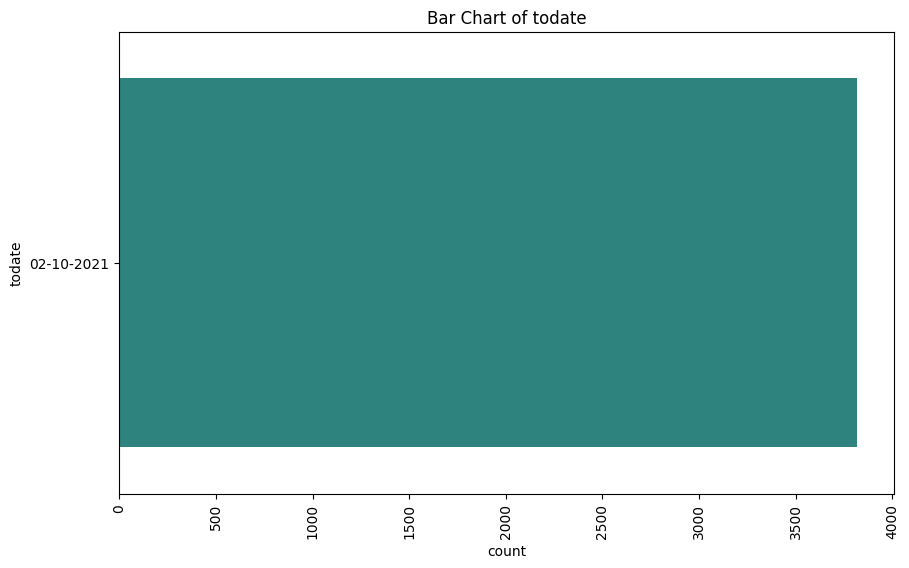

In [37]:
# Bar Chart for categorical columns
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data[col], palette='viridis')
    plt.title(f'Bar Chart of {col}')
    plt.xticks(rotation=90)
    plt.show()


               slno  seatCapacity  insuranceValidity_year  \
count  3.819000e+03   3819.000000             3819.000000   
mean   5.410393e+06      2.559706             2025.550668   
std    1.863841e+06      0.948298                1.136903   
min    1.233000e+03      0.000000             2021.000000   
25%    5.410393e+06      2.000000             2026.000000   
50%    5.410393e+06      2.559706             2026.000000   
75%    5.410393e+06      2.559706             2026.000000   
max    1.059802e+07     10.000000             2026.000000   

       insuranceValidity_month  insuranceValidity_day  
count              3819.000000            3819.000000  
mean                  9.043467              27.753077  
std                   0.390693               7.137579  
min                   1.000000               1.000000  
25%                   9.000000              30.000000  
50%                   9.000000              30.000000  
75%                   9.000000              30.000000  
ma

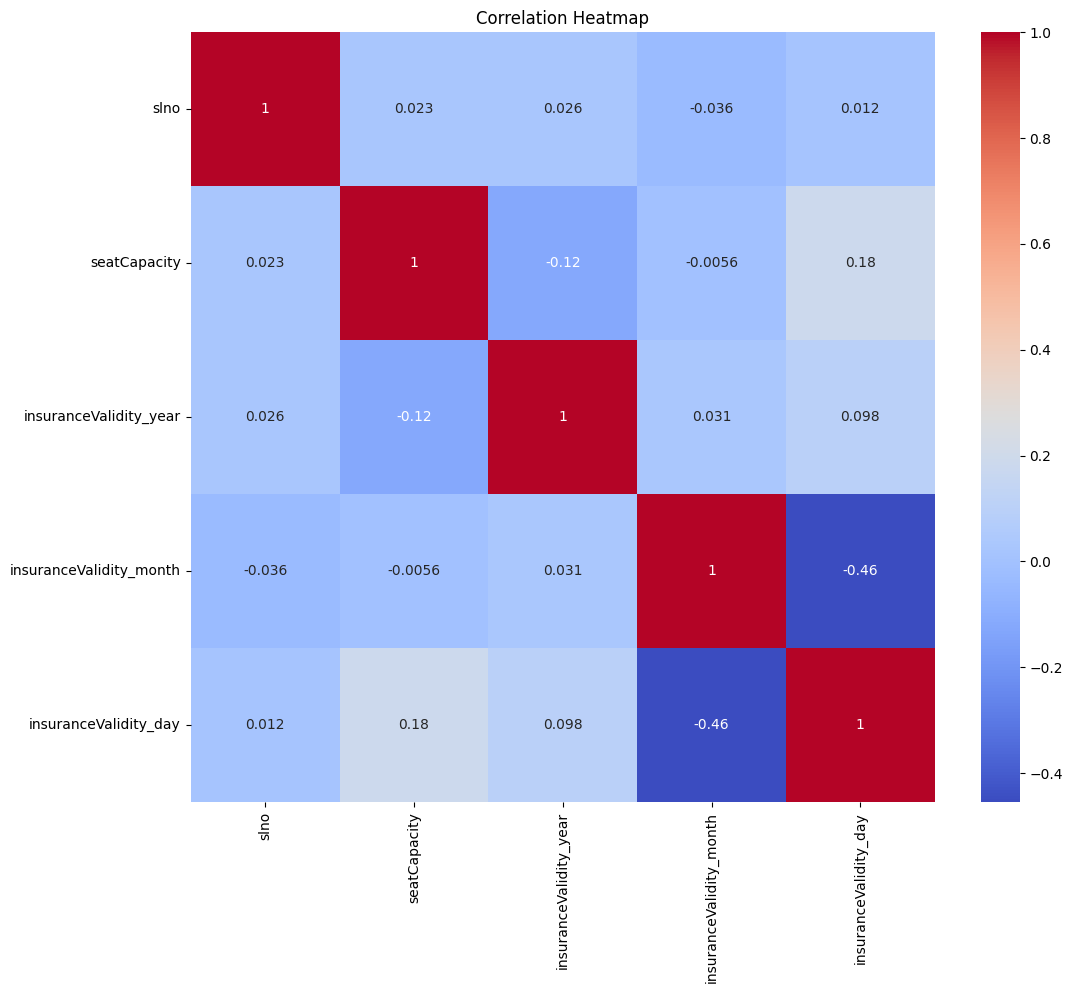

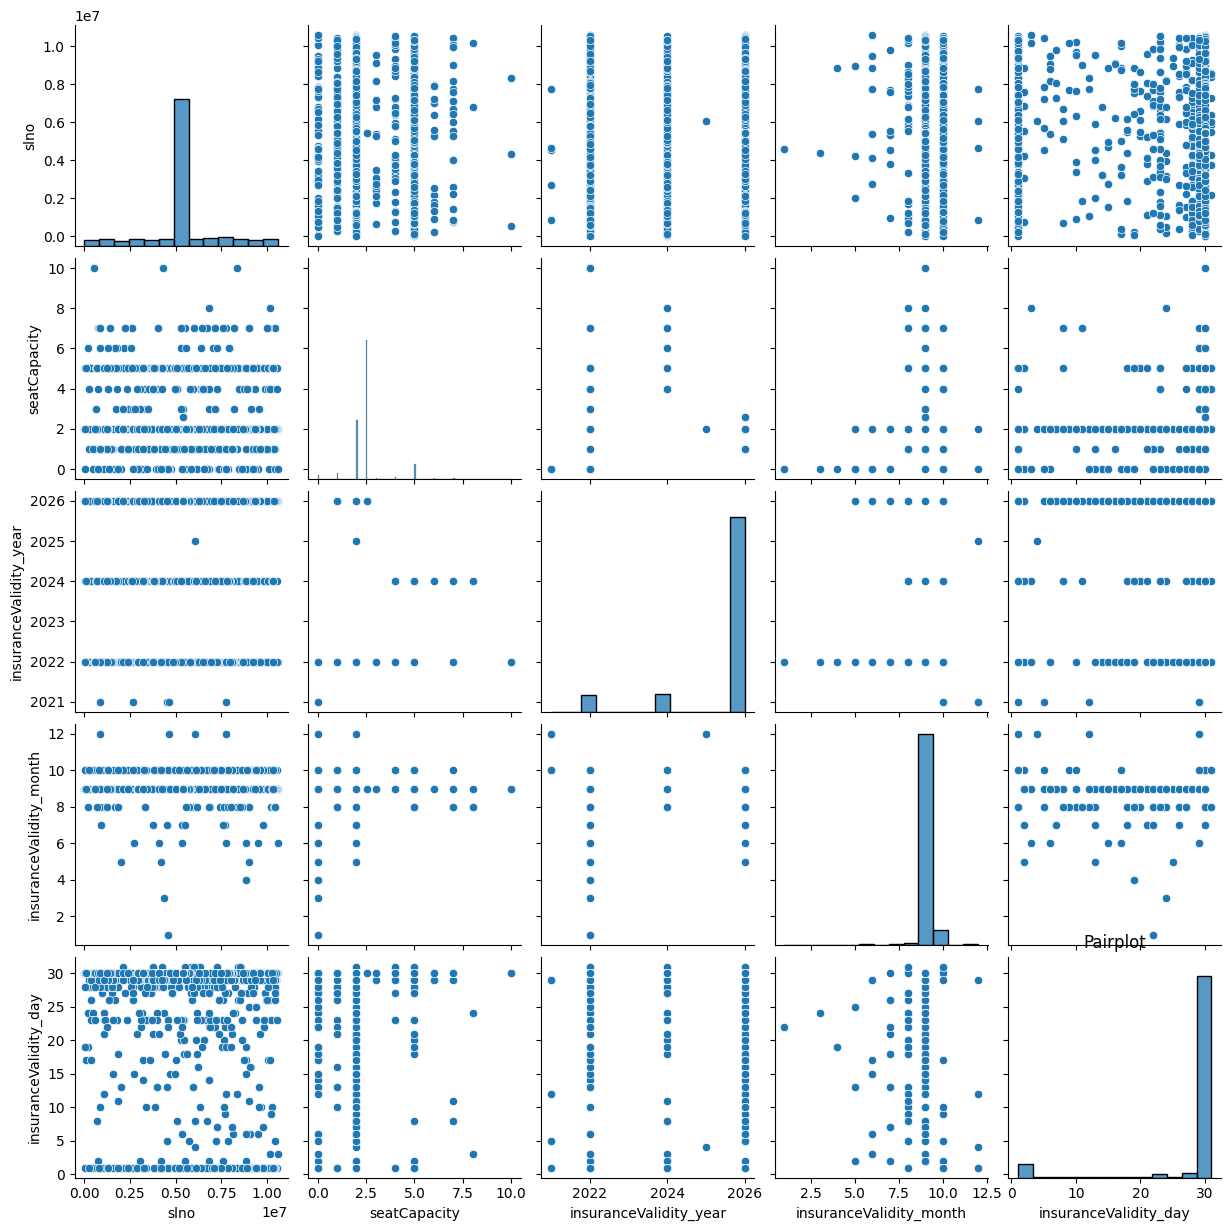

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate summary statistics
print(data.describe())

# Select numeric columns for correlation heatmap
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()

# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot
sns.pairplot(data[numeric_columns])
plt.title('Pairplot')
plt.show()



In [41]:
# Identifying a suitable numeric column
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
print(numeric_columns)


['slno', 'seatCapacity', 'insuranceValidity_year', 'insuranceValidity_month', 'insuranceValidity_day']


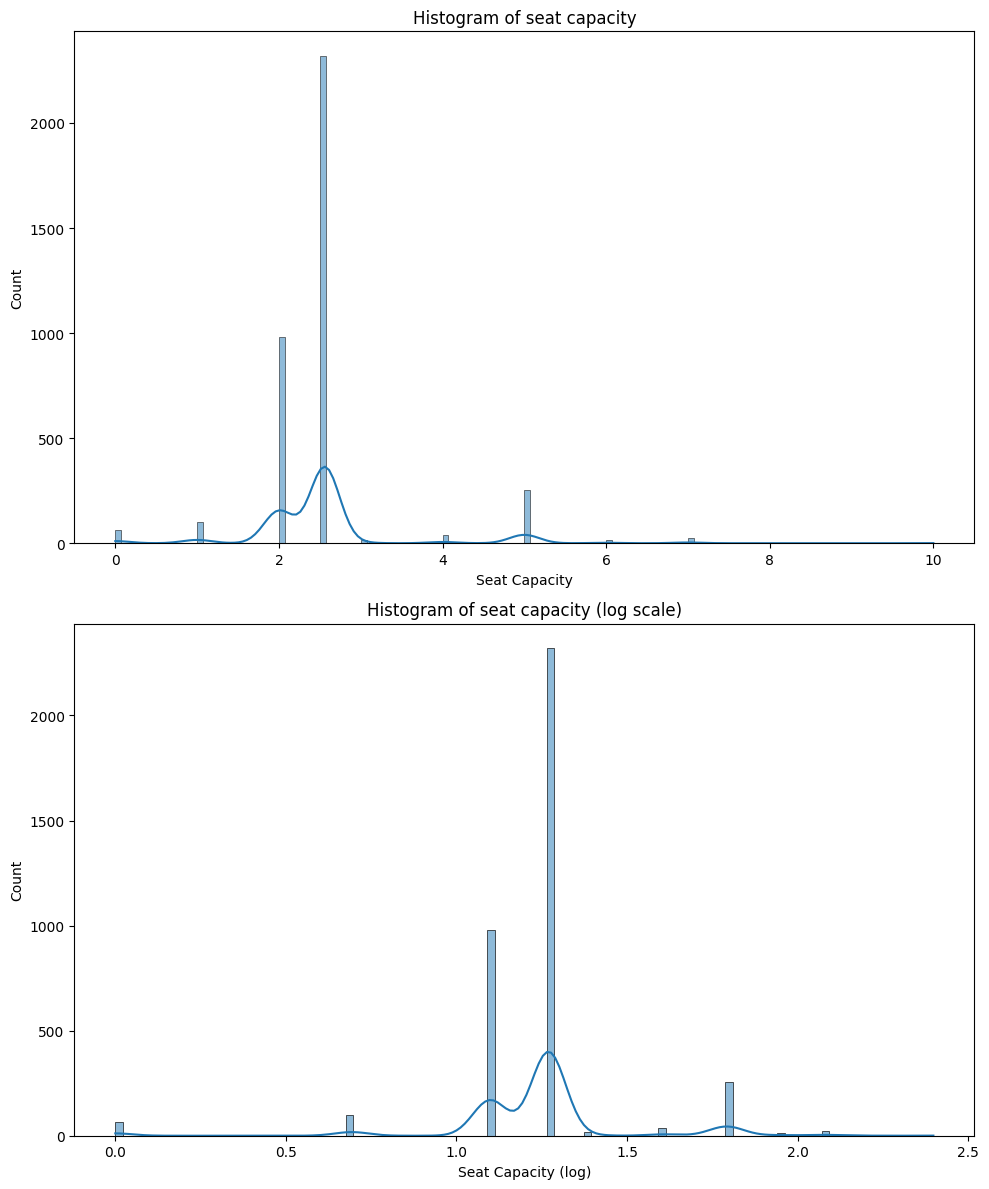

In [42]:
# Use seatCapacity for the histogram example
column_of_interest = 'seatCapacity'

# Ensure there are no missing or non-numeric values
data[column_of_interest] = pd.to_numeric(data[column_of_interest], errors='coerce')
data = data.dropna(subset=[column_of_interest])

# Plotting the histograms
plt.figure(figsize=(10, 12))

# Original seatCapacity histogram
plt.subplot(2, 1, 1)
sns.histplot(data[column_of_interest], kde=True)
plt.title('Histogram of seat capacity')
plt.xlabel('Seat Capacity')
plt.ylabel('Count')

# Log-transformed seatCapacity histogram
plt.subplot(2, 1, 2)
sns.histplot(np.log1p(data[column_of_interest]), kde=True)
plt.title('Histogram of seat capacity (log scale)')
plt.xlabel('Seat Capacity (log)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()
